In [1]:
%matplotlib notebook
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    
    from game import Game
    from data_preprocess import get_data_points, get_dummy_data
    from utils import get_feature_extractor_model, get_features, message_to_image, message_to_image_sm
    from agents import get_agents
    
    import numpy as np
    import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs

Using TensorFlow backend.


In [2]:

sender_type = "aware"

n_features = 3
n_clusters = 5
n_samples = 3
n_vocab = 5

n_batches = 10
n_epochs = 1000000

n_all_features = 512

max_len = 2

img_dim = 0
img_rows = 0
img_cols = 0
img_features_len = 1

n_batches = 128
n_epochs = 10000000
action_size = 1
num_actions = n_vocab

n_population = 1

ppo_config = "configs/ppo-big-200.json"
network_config = "configs/mlp3_network-200.json"
data_csv_path = "data_csvs/cifar_feats.csv"
feat_model_path = 'feature_extractors/feature_model.h5'
feature_model_json_path = 'feature_extractors/feature_model.json'

flip_s = False
flip_l = False
freq = 1
debug = True

In [3]:
# Get data, prepare Agents, get feature extractor, initialize logging, create game pool

X1, Y1, n_features = get_dummy_data(n_samples = 13000, n_features=n_features, centers=n_clusters)
X1, X1_test, Y1, Y1_test = X1[:10000, :], X1[10000:, :], Y1[:10000], Y1[:10000]

print(X1.shape, Y1.shape, X1_test.shape, Y1_test.shape)
Speakers, Listeners = [], []

for it in range(n_population):
    Speaker1, Listener1 = get_agents(ppo_config, network_config, sender_type, n_features, img_dim, img_features_len, n_samples, num_actions, action_size)
    Speakers.append(Speaker1)
    Listeners.append(Listener1)
intermediate_layer_model = get_feature_extractor_model(feat_model_path, feature_model_json_path)

big_rewards = []
data = []
game_pool = []

for i in range(n_batches):
    game_pool.append(Game(n_features, n_clusters, n_samples, n_vocab, sender_type, [X1, Y1]))




(10000, 3) (10000,) (3000, 3) (10000,)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<IPython.core.display.Javascript object>


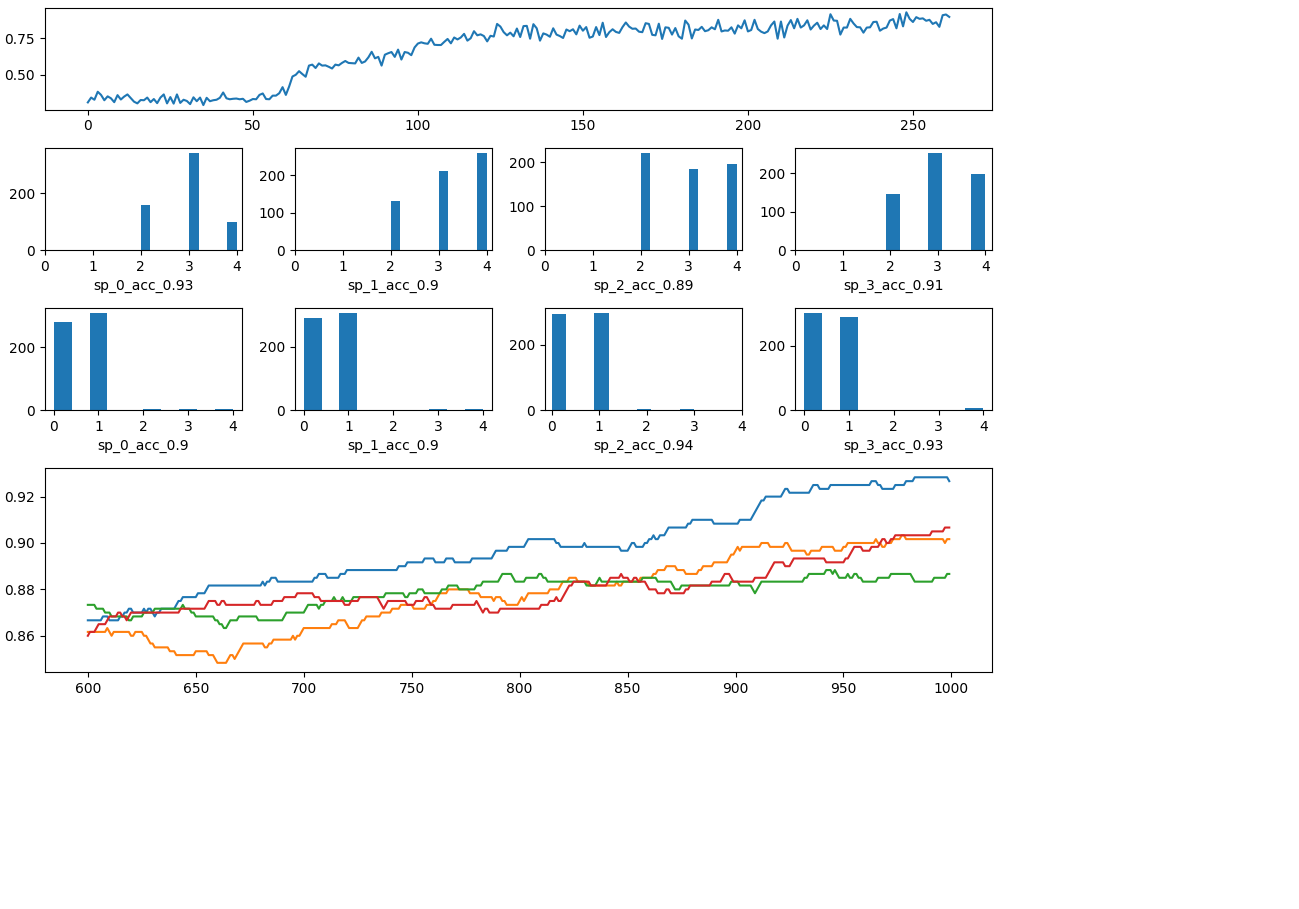

 message:  [3]  output:  0  epoch no:  0  avg reward 0.3515625
 epoch no:  0  avg reward 0.3515625


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 message:  [4]  output:  0  epoch no:  100  avg reward 0.30833333333333335
 epoch no:  100  avg reward 0.30833333333333335
 message:  [1]  output:  2  epoch no:  200  avg reward 0.3416666666666667
 epoch no:  200  avg reward 0.3416666666666667
 message:  [1]  output:  0  epoch no:  300  avg reward 0.32666666666666666
 epoch no:  300  avg reward 0.32666666666666666
 message:  [1]  output:  2  epoch no:  400  avg reward 0.38166666666666665
 epoch no:  400  avg reward 0.38166666666666665
 message:  [3]  output:  0  epoch no:  500  avg reward 0.36
 epoch no:  500  avg reward 0.36
 message:  [2]  output:  1  epoch no:  600  avg reward 0.3233333333333333
 epoch no:  600  avg reward 0.3233333333333333
 message:  [2]  output:  0  epoch no:  700  avg reward 0.35
 epoch no:  700  avg reward 0.35
 message:  [3]  output:  0  epoch no:  800  avg reward 0.33666666666666667
 epoch no:  800  avg reward 0.33666666666666667
 message:  [2]  output:  0  epoch no:  900  avg reward 0.31
 epoch no:  900  avg

 message:  [4]  output:  1  epoch no:  7300  avg reward 0.5633333333333334
 epoch no:  7300  avg reward 0.5633333333333334
 message:  [4]  output:  1  epoch no:  7400  avg reward 0.5533333333333333
 epoch no:  7400  avg reward 0.5533333333333333
 message:  [3]  output:  2  epoch no:  7500  avg reward 0.5416666666666666
 epoch no:  7500  avg reward 0.5416666666666666
 message:  [0]  output:  0  epoch no:  7600  avg reward 0.5683333333333334
 epoch no:  7600  avg reward 0.5683333333333334
 message:  [0]  output:  0  epoch no:  7700  avg reward 0.5633333333333334
 epoch no:  7700  avg reward 0.5633333333333334
 message:  [0]  output:  2  epoch no:  7800  avg reward 0.58
 epoch no:  7800  avg reward 0.58
 message:  [2]  output:  2  epoch no:  7900  avg reward 0.5933333333333334
 epoch no:  7900  avg reward 0.5933333333333334
 message:  [2]  output:  2  epoch no:  8000  avg reward 0.58
 epoch no:  8000  avg reward 0.58
 message:  [0]  output:  0  epoch no:  8100  avg reward 0.57833333333333

 message:  [0]  output:  2  epoch no:  14500  avg reward 0.7516666666666667
 epoch no:  14500  avg reward 0.7516666666666667
 message:  [3]  output:  1  epoch no:  14600  avg reward 0.81
 epoch no:  14600  avg reward 0.81
 message:  [4]  output:  2  epoch no:  14700  avg reward 0.7983333333333333
 epoch no:  14700  avg reward 0.7983333333333333
 message:  [2]  output:  2  epoch no:  14800  avg reward 0.8116666666666666
 epoch no:  14800  avg reward 0.8116666666666666
 message:  [3]  output:  0  epoch no:  14900  avg reward 0.7766666666666666
 epoch no:  14900  avg reward 0.7766666666666666
 message:  [2]  output:  0  epoch no:  15000  avg reward 0.8366666666666667
 epoch no:  15000  avg reward 0.8366666666666667
 message:  [1]  output:  2  epoch no:  15100  avg reward 0.8016666666666666
 epoch no:  15100  avg reward 0.8016666666666666
 message:  [1]  output:  2  epoch no:  15200  avg reward 0.8266666666666667
 epoch no:  15200  avg reward 0.8266666666666667
 message:  [3]  output:  2  

 message:  [1]  output:  0  epoch no:  21500  avg reward 0.8183333333333334
 epoch no:  21500  avg reward 0.8183333333333334
 message:  [3]  output:  0  epoch no:  21600  avg reward 0.8833333333333333
 epoch no:  21600  avg reward 0.8833333333333333
 message:  [3]  output:  1  epoch no:  21700  avg reward 0.8233333333333334
 epoch no:  21700  avg reward 0.8233333333333334
 message:  [4]  output:  0  epoch no:  21800  avg reward 0.8383333333333334
 epoch no:  21800  avg reward 0.8383333333333334
 message:  [4]  output:  0  epoch no:  21900  avg reward 0.8733333333333333
 epoch no:  21900  avg reward 0.8733333333333333
 message:  [4]  output:  2  epoch no:  22000  avg reward 0.81
 epoch no:  22000  avg reward 0.81
 message:  [0]  output:  2  epoch no:  22100  avg reward 0.8366666666666667
 epoch no:  22100  avg reward 0.8366666666666667
 message:  [2]  output:  2  epoch no:  22200  avg reward 0.8566666666666667
 epoch no:  22200  avg reward 0.8566666666666667
 message:  [2]  output:  0  

KeyboardInterrupt: 

In [33]:
### N population 4
speaker_messages = [[[] for i in range(n_population)] for j in range(2)]
speaker_rews = [[[] for i in range(n_population)] for j in range(2)]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(5, 4)
f3_ax1 = fig.add_subplot(gs[0:1, :])
f3_ax2 = fig.add_subplot(gs[1:2, 0])
f3_ax3 = fig.add_subplot(gs[1:2, 1])
f3_ax4 = fig.add_subplot(gs[1:2, 2])
f3_ax5 = fig.add_subplot(gs[1:2, 3])

f3_ax6 = fig.add_subplot(gs[2:3, 0])
f3_ax7 = fig.add_subplot(gs[2:3, 1])
f3_ax8 = fig.add_subplot(gs[2:3, 2])
f3_ax9 = fig.add_subplot(gs[2:3, 3])

f3_ax10 = fig.add_subplot(gs[3:, :])

# fig, (ax1, ax2) = plt.subplots(2, 1)
myaxes = [f3_ax2, f3_ax3, f3_ax4, f3_ax5]
myaxes2 = [f3_ax6, f3_ax7, f3_ax8, f3_ax9]

fig.set_figheight(7)
fig.set_figwidth(10)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    s_id = np.random.choice(n_population)
    l_id = np.random.choice(n_population)
    Speaker = Speakers[s_id]
    Listener = Listeners[l_id]
    
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
        if np.all(np.array(game_pool[b].nos)==np.array([0,1,2])):
            speaker_messages[0][s_id].append(message[0])
        elif game_pool[b].nos[0]==1:
            speaker_messages[1][s_id].append(message[0])
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        if np.all(np.array(game_pool[b].nos)==np.array([0,1,2])):
            speaker_rews[0][s_id].append(rew)
        elif game_pool[b].nos[0]==1:
            speaker_rews[1][s_id].append(rew)
            
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
        
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        f3_ax1.clear()
        for i in myaxes:
            i.clear()
        for i in myaxes2:
            i.clear()
        f3_ax10.clear()
        f3_ax1.plot(data)
        acc = [[0 for i in range(n_population)] for j in range(2)]
        for i in range(n_population):
            myaxes[i].hist(speaker_messages[0][i][-600:])
            myaxes[i].set_xticks(range(0,n_vocab))
            acc[0][i] = np.round(np.mean(speaker_rews[0][i][-600:]), 2)
            myaxes[i].set_xlabel("sp_{}_acc_{}".format(i, acc[0][i]))
        for i in range(n_population):
            myaxes2[i].hist(speaker_messages[1][i][-600:])
            myaxes2[i].set_xticks(range(0,n_vocab))
            acc[1][i] = np.round(np.mean(speaker_rews[1][i][-600:]), 2)
            myaxes2[i].set_xlabel("sp_{}_acc_{}".format(i, acc[1][i]))
        def run(rews):
            r2 = rews[-1000:]
            out = []
            for i in range(len(r2)):
                out.append(np.mean(r2[i-600:i]))
            return out
        for i in range(n_population):
            f3_ax10.plot(run(speaker_rews[0][i]), label = 'speaker_{}'.format(str(i)))
        fig.canvas.draw()



<IPython.core.display.Javascript object>


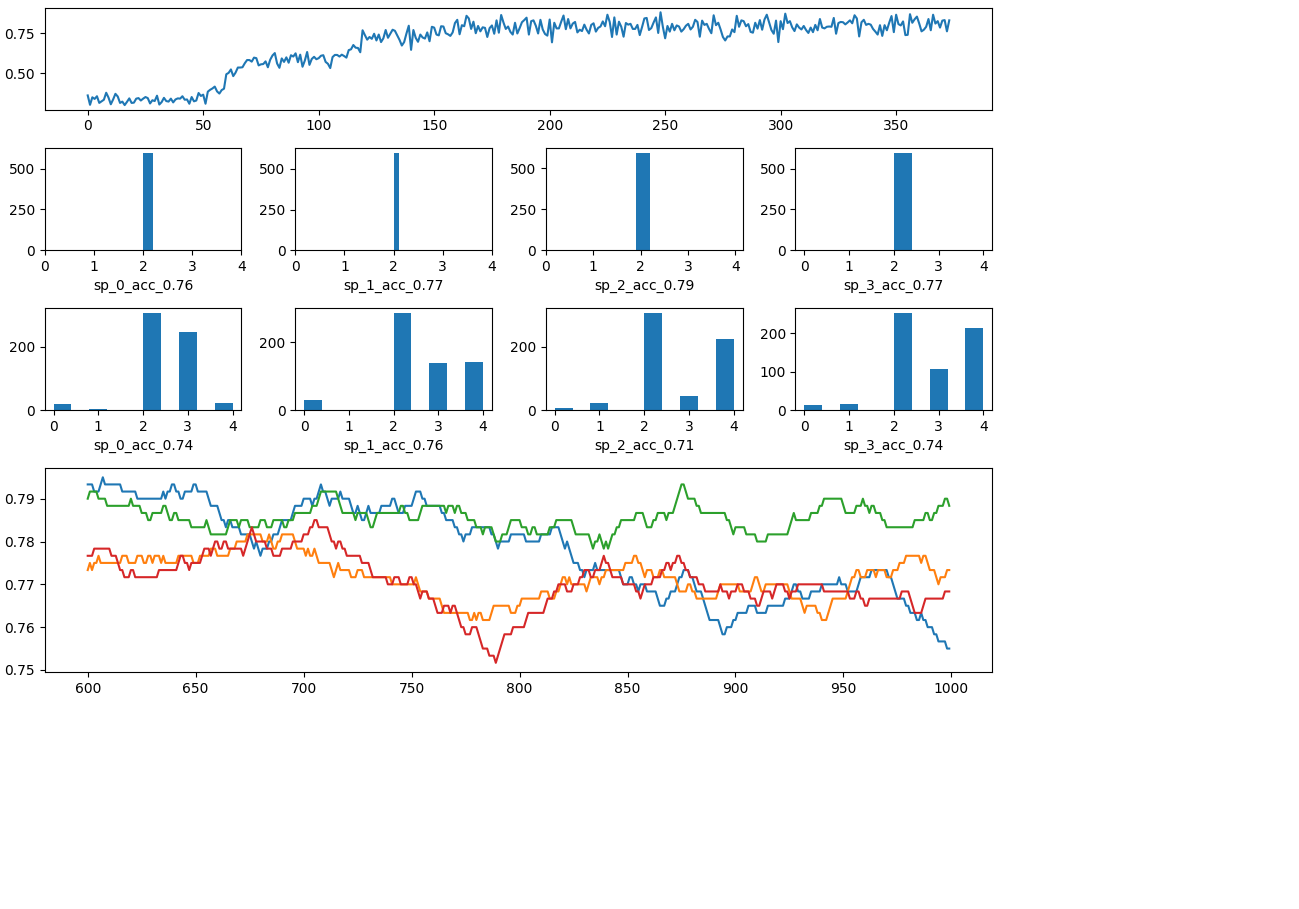

 message:  [2]  output:  2  epoch no:  0  avg reward 0.3125
 epoch no:  0  avg reward 0.3125


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 message:  [2]  output:  0  epoch no:  100  avg reward 0.36333333333333334
 epoch no:  100  avg reward 0.36333333333333334
 message:  [1]  output:  2  epoch no:  200  avg reward 0.305
 epoch no:  200  avg reward 0.305
 message:  [1]  output:  2  epoch no:  300  avg reward 0.3516666666666667
 epoch no:  300  avg reward 0.3516666666666667
 message:  [4]  output:  2  epoch no:  400  avg reward 0.3416666666666667
 epoch no:  400  avg reward 0.3416666666666667
 message:  [4]  output:  1  epoch no:  500  avg reward 0.35833333333333334
 epoch no:  500  avg reward 0.35833333333333334
 message:  [4]  output:  1  epoch no:  600  avg reward 0.31666666666666665
 epoch no:  600  avg reward 0.31666666666666665
 message:  [1]  output:  2  epoch no:  700  avg reward 0.32666666666666666
 epoch no:  700  avg reward 0.32666666666666666
 message:  [3]  output:  1  epoch no:  800  avg reward 0.33666666666666667
 epoch no:  800  avg reward 0.33666666666666667
 message:  [1]  output:  0  epoch no:  900  avg 

 message:  [3]  output:  2  epoch no:  7100  avg reward 0.5833333333333334
 epoch no:  7100  avg reward 0.5833333333333334
 message:  [1]  output:  0  epoch no:  7200  avg reward 0.5733333333333334
 epoch no:  7200  avg reward 0.5733333333333334
 message:  [1]  output:  1  epoch no:  7300  avg reward 0.5983333333333334
 epoch no:  7300  avg reward 0.5983333333333334
 message:  [3]  output:  1  epoch no:  7400  avg reward 0.595
 epoch no:  7400  avg reward 0.595
 message:  [0]  output:  0  epoch no:  7500  avg reward 0.55
 epoch no:  7500  avg reward 0.55
 message:  [3]  output:  0  epoch no:  7600  avg reward 0.5566666666666666
 epoch no:  7600  avg reward 0.5566666666666666
 message:  [3]  output:  2  epoch no:  7700  avg reward 0.5583333333333333
 epoch no:  7700  avg reward 0.5583333333333333
 message:  [4]  output:  2  epoch no:  7800  avg reward 0.575
 epoch no:  7800  avg reward 0.575
 message:  [4]  output:  2  epoch no:  7900  avg reward 0.5383333333333333
 epoch no:  7900  avg

 message:  [1]  output:  1  epoch no:  14400  avg reward 0.6966666666666667
 epoch no:  14400  avg reward 0.6966666666666667
 message:  [2]  output:  0  epoch no:  14500  avg reward 0.7416666666666667
 epoch no:  14500  avg reward 0.7416666666666667
 message:  [1]  output:  1  epoch no:  14600  avg reward 0.7233333333333334
 epoch no:  14600  avg reward 0.7233333333333334
 message:  [1]  output:  1  epoch no:  14700  avg reward 0.7166666666666667
 epoch no:  14700  avg reward 0.7166666666666667
 message:  [2]  output:  1  epoch no:  14800  avg reward 0.755
 epoch no:  14800  avg reward 0.755
 message:  [2]  output:  1  epoch no:  14900  avg reward 0.7
 epoch no:  14900  avg reward 0.7
 message:  [4]  output:  1  epoch no:  15000  avg reward 0.79
 epoch no:  15000  avg reward 0.79
 message:  [3]  output:  1  epoch no:  15100  avg reward 0.785
 epoch no:  15100  avg reward 0.785
 message:  [4]  output:  1  epoch no:  15200  avg reward 0.7416666666666667
 epoch no:  15200  avg reward 0.74

 message:  [0]  output:  0  epoch no:  21500  avg reward 0.7633333333333333
 epoch no:  21500  avg reward 0.7633333333333333
 message:  [2]  output:  1  epoch no:  21600  avg reward 0.8033333333333333
 epoch no:  21600  avg reward 0.8033333333333333
 message:  [2]  output:  1  epoch no:  21700  avg reward 0.7716666666666666
 epoch no:  21700  avg reward 0.7716666666666666
 message:  [0]  output:  0  epoch no:  21800  avg reward 0.7483333333333333
 epoch no:  21800  avg reward 0.7483333333333333
 message:  [2]  output:  2  epoch no:  21900  avg reward 0.8016666666666666
 epoch no:  21900  avg reward 0.8016666666666666
 message:  [4]  output:  1  epoch no:  22000  avg reward 0.8116666666666666
 epoch no:  22000  avg reward 0.8116666666666666
 message:  [4]  output:  1  epoch no:  22100  avg reward 0.76
 epoch no:  22100  avg reward 0.76
 message:  [4]  output:  1  epoch no:  22200  avg reward 0.7833333333333333
 epoch no:  22200  avg reward 0.7833333333333333
 message:  [4]  output:  2  

 message:  [3]  output:  1  epoch no:  28600  avg reward 0.7933333333333333
 epoch no:  28600  avg reward 0.7933333333333333
 message:  [0]  output:  1  epoch no:  28700  avg reward 0.8066666666666666
 epoch no:  28700  avg reward 0.8066666666666666
 message:  [1]  output:  0  epoch no:  28800  avg reward 0.7583333333333333
 epoch no:  28800  avg reward 0.7583333333333333
 message:  [2]  output:  2  epoch no:  28900  avg reward 0.7533333333333333
 epoch no:  28900  avg reward 0.7533333333333333
 message:  [4]  output:  0  epoch no:  29000  avg reward 0.815
 epoch no:  29000  avg reward 0.815
 message:  [0]  output:  0  epoch no:  29100  avg reward 0.7783333333333333
 epoch no:  29100  avg reward 0.7783333333333333
 message:  [2]  output:  0  epoch no:  29200  avg reward 0.8316666666666667
 epoch no:  29200  avg reward 0.8316666666666667
 message:  [4]  output:  1  epoch no:  29300  avg reward 0.7716666666666666
 epoch no:  29300  avg reward 0.7716666666666666
 message:  [1]  output:  1

 message:  [1]  output:  2  epoch no:  35800  avg reward 0.815
 epoch no:  35800  avg reward 0.815
 message:  [4]  output:  0  epoch no:  35900  avg reward 0.8366666666666667
 epoch no:  35900  avg reward 0.8366666666666667
 message:  [3]  output:  0  epoch no:  36000  avg reward 0.8533333333333334
 epoch no:  36000  avg reward 0.8533333333333334
 message:  [2]  output:  0  epoch no:  36100  avg reward 0.81
 epoch no:  36100  avg reward 0.81
 message:  [3]  output:  1  epoch no:  36200  avg reward 0.7616666666666667
 epoch no:  36200  avg reward 0.7616666666666667
 message:  [2]  output:  1  epoch no:  36300  avg reward 0.7716666666666666
 epoch no:  36300  avg reward 0.7716666666666666
 message:  [2]  output:  1  epoch no:  36400  avg reward 0.79
 epoch no:  36400  avg reward 0.79
 message:  [4]  output:  1  epoch no:  36500  avg reward 0.8383333333333334
 epoch no:  36500  avg reward 0.8383333333333334
 message:  [0]  output:  0  epoch no:  36600  avg reward 0.7683333333333333
 epoch

KeyboardInterrupt: 

In [30]:
### N population 4
speaker_messages = [[[] for i in range(n_population)] for j in range(2)]
speaker_rews = [[[] for i in range(n_population)] for j in range(2)]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(5, 4)
f3_ax1 = fig.add_subplot(gs[0:1, :])
f3_ax2 = fig.add_subplot(gs[1:2, 0])
f3_ax3 = fig.add_subplot(gs[1:2, 1])
f3_ax4 = fig.add_subplot(gs[1:2, 2])
f3_ax5 = fig.add_subplot(gs[1:2, 3])

f3_ax6 = fig.add_subplot(gs[2:3, 0])
f3_ax7 = fig.add_subplot(gs[2:3, 1])
f3_ax8 = fig.add_subplot(gs[2:3, 2])
f3_ax9 = fig.add_subplot(gs[2:3, 3])

f3_ax10 = fig.add_subplot(gs[3:, :])

# fig, (ax1, ax2) = plt.subplots(2, 1)
myaxes = [f3_ax2, f3_ax3, f3_ax4, f3_ax5]
myaxes2 = [f3_ax6, f3_ax7, f3_ax8, f3_ax9]

fig.set_figheight(7)
fig.set_figwidth(10)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    s_id = np.random.choice(n_population)
    l_id = np.random.choice(n_population)
    Speaker = Speakers[s_id]
    Listener = Listeners[l_id]
    
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
        if np.all(np.array(game_pool[b].nos)==np.array([0,1,2])):
            speaker_messages[0][s_id].append(message[0])
        elif game_pool[b].nos[0]==1:
            speaker_messages[1][s_id].append(message[0])
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        if np.all(np.array(game_pool[b].nos)==np.array([0,1,2])):
            speaker_rews[0][s_id].append(rew)
        elif game_pool[b].nos[0]==1:
            speaker_rews[1][s_id].append(rew)
            
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
        
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        f3_ax1.clear()
        for i in myaxes:
            i.clear()
        for i in myaxes2:
            i.clear()
        f3_ax10.clear()
        f3_ax1.plot(data)
        acc = [[0 for i in range(n_population)] for j in range(2)]
        for i in range(n_population):
            myaxes[i].hist(speaker_messages[0][i][-600:])
            myaxes[i].set_xticks(range(0,n_vocab))
            acc[0][i] = np.round(np.mean(speaker_rews[0][i][-600:]), 2)
            myaxes[i].set_xlabel("sp_{}_acc_{}".format(i, acc[0][i]))
        for i in range(n_population):
            myaxes2[i].hist(speaker_messages[1][i][-600:])
            myaxes2[i].set_xticks(range(0,n_vocab))
            acc[1][i] = np.round(np.mean(speaker_rews[1][i][-600:]), 2)
            myaxes2[i].set_xlabel("sp_{}_acc_{}".format(i, acc[1][i]))
        def run(rews):
            r2 = rews[-1000:]
            out = []
            for i in range(len(r2)):
                out.append(np.mean(r2[i-600:i]))
            return out
        for i in range(n_population):
            f3_ax10.plot(run(speaker_rews[0][i]), label = 'speaker_{}'.format(str(i)))
        fig.canvas.draw()



<IPython.core.display.Javascript object>


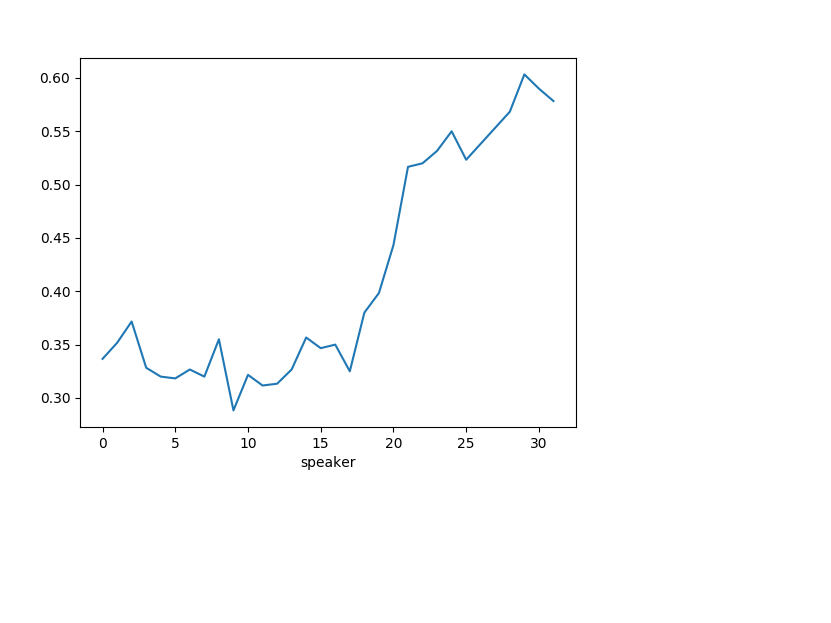

 message:  [0]  output:  2  epoch no:  0  avg reward 0.4375
 epoch no:  0  avg reward 0.4375
 message:  [1]  output:  0  epoch no:  100  avg reward 0.33666666666666667
 epoch no:  100  avg reward 0.33666666666666667
 message:  [0]  output:  0  epoch no:  200  avg reward 0.3516666666666667
 epoch no:  200  avg reward 0.3516666666666667
 message:  [0]  output:  0  epoch no:  300  avg reward 0.37166666666666665
 epoch no:  300  avg reward 0.37166666666666665
 message:  [1]  output:  0  epoch no:  400  avg reward 0.3283333333333333
 epoch no:  400  avg reward 0.3283333333333333
 message:  [1]  output:  0  epoch no:  500  avg reward 0.32
 epoch no:  500  avg reward 0.32
 message:  [0]  output:  0  epoch no:  600  avg reward 0.31833333333333336
 epoch no:  600  avg reward 0.31833333333333336
 message:  [3]  output:  0  epoch no:  700  avg reward 0.32666666666666666
 epoch no:  700  avg reward 0.32666666666666666
 message:  [1]  output:  0  epoch no:  800  avg reward 0.32
 epoch no:  800  avg

KeyboardInterrupt: 

In [14]:
### N population 2

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break



In [6]:
dir(Speakers[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'act',
 'actions',
 'actions_exploration',
 'atomic_observe',
 'baseline',
 'baseline_mode',
 'baseline_optimizer',
 'batched_observe',
 'batching_capacity',
 'close',
 'current_actions',
 'current_internals',
 'current_reward',
 'current_states',
 'current_terminal',
 'device',
 'discount',
 'distributions',
 'entropy_regularization',
 'episode',
 'execution',
 'from_spec',
 'gae_lambda',
 'import_experience',
 'initialize_model',
 'last_observation',
 'likelihood_ratio_clipping',
 'memory',
 'meta_param_recorder',
 'model',
 'network',
 'next_internals',
 'observe',
 'observe_reward',
 'observe_terminal',
 'optimizer',
 'reset',
 'restore_mo

<IPython.core.display.Javascript object>


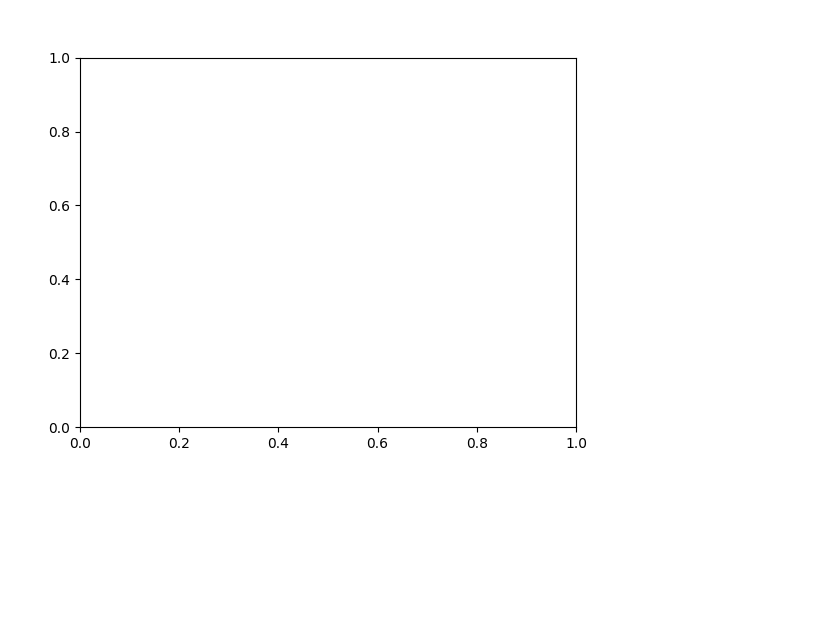

AttributeError: 'PPOAgent' object has no attribute 'get_variables'

In [5]:
### N population 2

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=True)  # (scalar between 0 and 4)
        message_batch.append(message)
        print(Speaker.get_variables())
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break



<IPython.core.display.Javascript object>


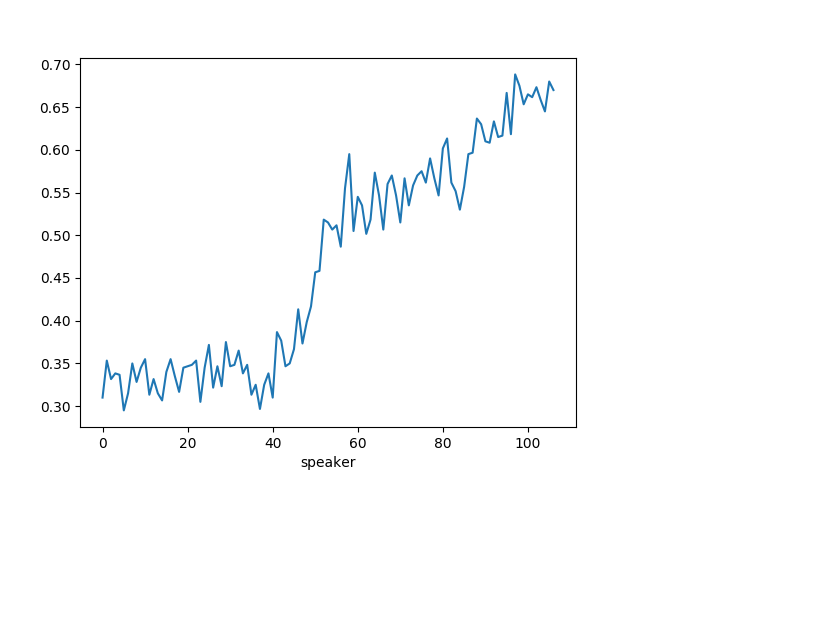

 message:  [3]  output:  2  epoch no:  0  avg reward 0.125
 epoch no:  0  avg reward 0.125
 message:  [3]  output:  0  epoch no:  100  avg reward 0.31
 epoch no:  100  avg reward 0.31
 message:  [4]  output:  0  epoch no:  200  avg reward 0.35333333333333333
 epoch no:  200  avg reward 0.35333333333333333
 message:  [2]  output:  1  epoch no:  300  avg reward 0.33166666666666667
 epoch no:  300  avg reward 0.33166666666666667
 message:  [0]  output:  0  epoch no:  400  avg reward 0.3383333333333333
 epoch no:  400  avg reward 0.3383333333333333
 message:  [4]  output:  0  epoch no:  500  avg reward 0.33666666666666667
 epoch no:  500  avg reward 0.33666666666666667
 message:  [3]  output:  1  epoch no:  600  avg reward 0.295
 epoch no:  600  avg reward 0.295
 message:  [4]  output:  1  epoch no:  700  avg reward 0.315
 epoch no:  700  avg reward 0.315
 message:  [0]  output:  1  epoch no:  800  avg reward 0.35
 epoch no:  800  avg reward 0.35
 message:  [2]  output:  0  epoch no:  900 

 message:  [1]  output:  0  epoch no:  7300  avg reward 0.535
 epoch no:  7300  avg reward 0.535
 message:  [1]  output:  2  epoch no:  7400  avg reward 0.5583333333333333
 epoch no:  7400  avg reward 0.5583333333333333
 message:  [1]  output:  1  epoch no:  7500  avg reward 0.57
 epoch no:  7500  avg reward 0.57
 message:  [3]  output:  1  epoch no:  7600  avg reward 0.575
 epoch no:  7600  avg reward 0.575
 message:  [1]  output:  0  epoch no:  7700  avg reward 0.5616666666666666
 epoch no:  7700  avg reward 0.5616666666666666
 message:  [3]  output:  1  epoch no:  7800  avg reward 0.59
 epoch no:  7800  avg reward 0.59
 message:  [1]  output:  0  epoch no:  7900  avg reward 0.5666666666666667
 epoch no:  7900  avg reward 0.5666666666666667
 message:  [1]  output:  2  epoch no:  8000  avg reward 0.5466666666666666
 epoch no:  8000  avg reward 0.5466666666666666
 message:  [3]  output:  1  epoch no:  8100  avg reward 0.6016666666666667
 epoch no:  8100  avg reward 0.6016666666666667
 

KeyboardInterrupt: 

In [11]:
### N population 4

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break



<IPython.core.display.Javascript object>


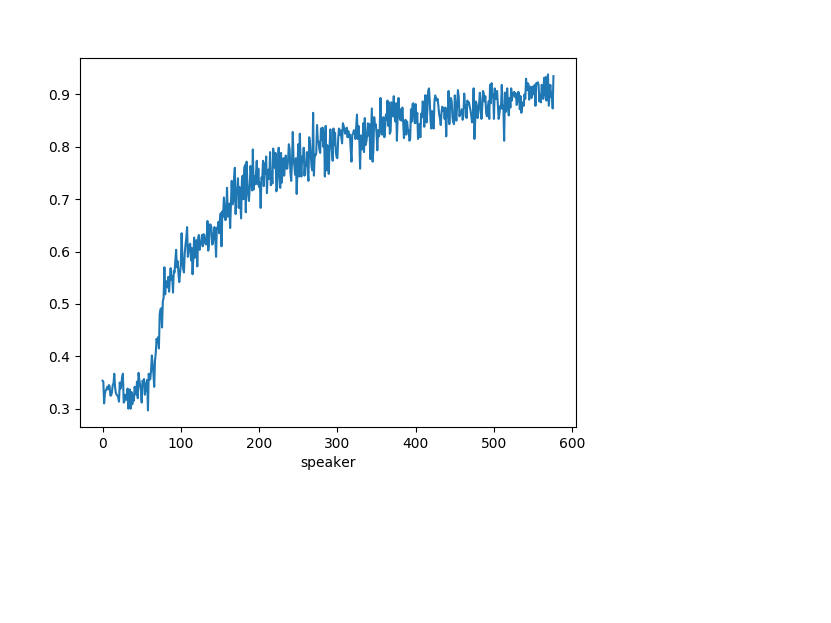

 message:  [4]  output:  0  epoch no:  0  avg reward 0.375
 epoch no:  0  avg reward 0.375
 message:  [0]  output:  2  epoch no:  100  avg reward 0.35333333333333333
 epoch no:  100  avg reward 0.35333333333333333
 message:  [3]  output:  0  epoch no:  200  avg reward 0.3516666666666667
 epoch no:  200  avg reward 0.3516666666666667
 message:  [0]  output:  0  epoch no:  300  avg reward 0.31
 epoch no:  300  avg reward 0.31
 message:  [0]  output:  1  epoch no:  400  avg reward 0.3283333333333333
 epoch no:  400  avg reward 0.3283333333333333
 message:  [1]  output:  2  epoch no:  500  avg reward 0.335
 epoch no:  500  avg reward 0.335
 message:  [1]  output:  0  epoch no:  600  avg reward 0.33666666666666667
 epoch no:  600  avg reward 0.33666666666666667
 message:  [3]  output:  0  epoch no:  700  avg reward 0.3416666666666667
 epoch no:  700  avg reward 0.3416666666666667
 message:  [2]  output:  2  epoch no:  800  avg reward 0.33666666666666667
 epoch no:  800  avg reward 0.3366666

 message:  [2]  output:  2  epoch no:  7100  avg reward 0.4266666666666667
 epoch no:  7100  avg reward 0.4266666666666667
 message:  [0]  output:  0  epoch no:  7200  avg reward 0.43666666666666665
 epoch no:  7200  avg reward 0.43666666666666665
 message:  [3]  output:  0  epoch no:  7300  avg reward 0.415
 epoch no:  7300  avg reward 0.415
 message:  [1]  output:  2  epoch no:  7400  avg reward 0.48
 epoch no:  7400  avg reward 0.48
 message:  [0]  output:  2  epoch no:  7500  avg reward 0.49
 epoch no:  7500  avg reward 0.49
 message:  [0]  output:  1  epoch no:  7600  avg reward 0.49166666666666664
 epoch no:  7600  avg reward 0.49166666666666664
 message:  [4]  output:  2  epoch no:  7700  avg reward 0.455
 epoch no:  7700  avg reward 0.455
 message:  [2]  output:  0  epoch no:  7800  avg reward 0.505
 epoch no:  7800  avg reward 0.505
 message:  [3]  output:  1  epoch no:  7900  avg reward 0.5116666666666667
 epoch no:  7900  avg reward 0.5116666666666667
 message:  [1]  output:

 message:  [4]  output:  0  epoch no:  14100  avg reward 0.6133333333333333
 epoch no:  14100  avg reward 0.6133333333333333
 message:  [1]  output:  2  epoch no:  14200  avg reward 0.615
 epoch no:  14200  avg reward 0.615
 message:  [4]  output:  0  epoch no:  14300  avg reward 0.6333333333333333
 epoch no:  14300  avg reward 0.6333333333333333
 message:  [0]  output:  1  epoch no:  14400  avg reward 0.6466666666666666
 epoch no:  14400  avg reward 0.6466666666666666
 message:  [4]  output:  2  epoch no:  14500  avg reward 0.6283333333333333
 epoch no:  14500  avg reward 0.6283333333333333
 message:  [4]  output:  2  epoch no:  14600  avg reward 0.59
 epoch no:  14600  avg reward 0.59
 message:  [1]  output:  0  epoch no:  14700  avg reward 0.645
 epoch no:  14700  avg reward 0.645
 message:  [2]  output:  0  epoch no:  14800  avg reward 0.645
 epoch no:  14800  avg reward 0.645
 message:  [4]  output:  0  epoch no:  14900  avg reward 0.6566666666666666
 epoch no:  14900  avg reward 

 message:  [0]  output:  0  epoch no:  21300  avg reward 0.7566666666666667
 epoch no:  21300  avg reward 0.7566666666666667
 message:  [4]  output:  0  epoch no:  21400  avg reward 0.7383333333333333
 epoch no:  21400  avg reward 0.7383333333333333
 message:  [2]  output:  2  epoch no:  21500  avg reward 0.79
 epoch no:  21500  avg reward 0.79
 message:  [2]  output:  0  epoch no:  21600  avg reward 0.7266666666666667
 epoch no:  21600  avg reward 0.7266666666666667
 message:  [0]  output:  2  epoch no:  21700  avg reward 0.7516666666666667
 epoch no:  21700  avg reward 0.7516666666666667
 message:  [2]  output:  0  epoch no:  21800  avg reward 0.73
 epoch no:  21800  avg reward 0.73
 message:  [4]  output:  2  epoch no:  21900  avg reward 0.7966666666666666
 epoch no:  21900  avg reward 0.7966666666666666
 message:  [2]  output:  1  epoch no:  22000  avg reward 0.7766666666666666
 epoch no:  22000  avg reward 0.7766666666666666
 message:  [1]  output:  2  epoch no:  22100  avg reward

 message:  [2]  output:  1  epoch no:  28500  avg reward 0.7433333333333333
 epoch no:  28500  avg reward 0.7433333333333333
 message:  [3]  output:  2  epoch no:  28600  avg reward 0.84
 epoch no:  28600  avg reward 0.84
 message:  [4]  output:  0  epoch no:  28700  avg reward 0.755
 epoch no:  28700  avg reward 0.755
 message:  [2]  output:  1  epoch no:  28800  avg reward 0.8033333333333333
 epoch no:  28800  avg reward 0.8033333333333333
 message:  [0]  output:  2  epoch no:  28900  avg reward 0.7666666666666667
 epoch no:  28900  avg reward 0.7666666666666667
 message:  [4]  output:  0  epoch no:  29000  avg reward 0.7483333333333333
 epoch no:  29000  avg reward 0.7483333333333333
 message:  [1]  output:  0  epoch no:  29100  avg reward 0.8
 epoch no:  29100  avg reward 0.8
 message:  [0]  output:  2  epoch no:  29200  avg reward 0.8333333333333334
 epoch no:  29200  avg reward 0.8333333333333334
 message:  [1]  output:  0  epoch no:  29300  avg reward 0.81
 epoch no:  29300  avg

 message:  [4]  output:  0  epoch no:  35700  avg reward 0.845
 epoch no:  35700  avg reward 0.845
 message:  [2]  output:  0  epoch no:  35800  avg reward 0.8233333333333334
 epoch no:  35800  avg reward 0.8233333333333334
 message:  [2]  output:  0  epoch no:  35900  avg reward 0.8533333333333334
 epoch no:  35900  avg reward 0.8533333333333334
 message:  [1]  output:  2  epoch no:  36000  avg reward 0.8566666666666667
 epoch no:  36000  avg reward 0.8566666666666667
 message:  [1]  output:  1  epoch no:  36100  avg reward 0.8183333333333334
 epoch no:  36100  avg reward 0.8183333333333334
 message:  [0]  output:  2  epoch no:  36200  avg reward 0.8366666666666667
 epoch no:  36200  avg reward 0.8366666666666667
 message:  [2]  output:  0  epoch no:  36300  avg reward 0.8616666666666667
 epoch no:  36300  avg reward 0.8616666666666667
 message:  [4]  output:  0  epoch no:  36400  avg reward 0.8516666666666667
 epoch no:  36400  avg reward 0.8516666666666667
 message:  [0]  output:  0

 message:  [4]  output:  2  epoch no:  42700  avg reward 0.8933333333333333
 epoch no:  42700  avg reward 0.8933333333333333
 message:  [2]  output:  0  epoch no:  42800  avg reward 0.8883333333333333
 epoch no:  42800  avg reward 0.8883333333333333
 message:  [3]  output:  0  epoch no:  42900  avg reward 0.8916666666666667
 epoch no:  42900  avg reward 0.8916666666666667
 message:  [4]  output:  0  epoch no:  43000  avg reward 0.8783333333333333
 epoch no:  43000  avg reward 0.8783333333333333
 message:  [0]  output:  2  epoch no:  43100  avg reward 0.8616666666666667
 epoch no:  43100  avg reward 0.8616666666666667
 message:  [2]  output:  2  epoch no:  43200  avg reward 0.855
 epoch no:  43200  avg reward 0.855
 message:  [0]  output:  2  epoch no:  43300  avg reward 0.8416666666666667
 epoch no:  43300  avg reward 0.8416666666666667
 message:  [3]  output:  1  epoch no:  43400  avg reward 0.865
 epoch no:  43400  avg reward 0.865
 message:  [2]  output:  1  epoch no:  43500  avg re

 message:  [3]  output:  1  epoch no:  49800  avg reward 0.9216666666666666
 epoch no:  49800  avg reward 0.9216666666666666
 message:  [4]  output:  2  epoch no:  49900  avg reward 0.895
 epoch no:  49900  avg reward 0.895
 message:  [1]  output:  1  epoch no:  50000  avg reward 0.9
 epoch no:  50000  avg reward 0.9
 message:  [0]  output:  2  epoch no:  50100  avg reward 0.8533333333333334
 epoch no:  50100  avg reward 0.8533333333333334
 message:  [1]  output:  0  epoch no:  50200  avg reward 0.9116666666666666
 epoch no:  50200  avg reward 0.9116666666666666
 message:  [3]  output:  2  epoch no:  50300  avg reward 0.8916666666666667
 epoch no:  50300  avg reward 0.8916666666666667
 message:  [0]  output:  0  epoch no:  50400  avg reward 0.8916666666666667
 epoch no:  50400  avg reward 0.8916666666666667
 message:  [1]  output:  0  epoch no:  50500  avg reward 0.9066666666666666
 epoch no:  50500  avg reward 0.9066666666666666
 message:  [2]  output:  1  epoch no:  50600  avg reward

 message:  [4]  output:  0  epoch no:  56900  avg reward 0.9233333333333333
 epoch no:  56900  avg reward 0.9233333333333333
 message:  [2]  output:  1  epoch no:  57000  avg reward 0.9383333333333334
 epoch no:  57000  avg reward 0.9383333333333334
 message:  [2]  output:  0  epoch no:  57100  avg reward 0.8783333333333333
 epoch no:  57100  avg reward 0.8783333333333333
 message:  [2]  output:  2  epoch no:  57200  avg reward 0.8983333333333333
 epoch no:  57200  avg reward 0.8983333333333333
 message:  [1]  output:  1  epoch no:  57300  avg reward 0.9183333333333333
 epoch no:  57300  avg reward 0.9183333333333333
 message:  [3]  output:  0  epoch no:  57400  avg reward 0.895
 epoch no:  57400  avg reward 0.895
 message:  [2]  output:  2  epoch no:  57500  avg reward 0.905
 epoch no:  57500  avg reward 0.905
 message:  [0]  output:  0  epoch no:  57600  avg reward 0.8733333333333333
 epoch no:  57600  avg reward 0.8733333333333333
 message:  [2]  output:  0  epoch no:  57700  avg re

KeyboardInterrupt: 

In [7]:
### N population 6

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break



<IPython.core.display.Javascript object>


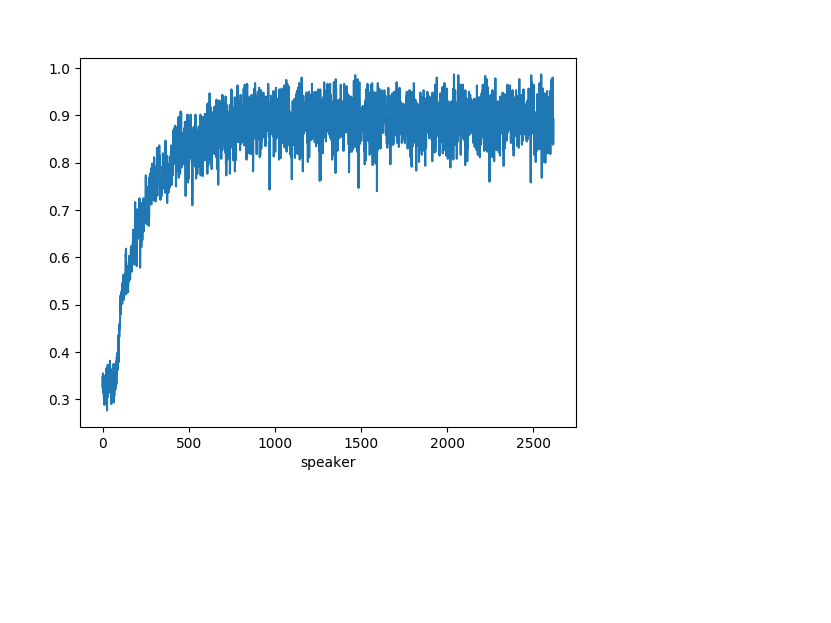

 message:  [3]  output:  1  epoch no:  0  avg reward 0.5
 epoch no:  0  avg reward 0.5
 message:  [4]  output:  0  epoch no:  100  avg reward 0.3466666666666667
 epoch no:  100  avg reward 0.3466666666666667
 message:  [3]  output:  0  epoch no:  200  avg reward 0.3233333333333333
 epoch no:  200  avg reward 0.3233333333333333
 message:  [2]  output:  1  epoch no:  300  avg reward 0.355
 epoch no:  300  avg reward 0.355
 message:  [2]  output:  1  epoch no:  400  avg reward 0.35333333333333333
 epoch no:  400  avg reward 0.35333333333333333
 message:  [0]  output:  0  epoch no:  500  avg reward 0.33666666666666667
 epoch no:  500  avg reward 0.33666666666666667
 message:  [1]  output:  2  epoch no:  600  avg reward 0.31333333333333335
 epoch no:  600  avg reward 0.31333333333333335
 message:  [1]  output:  1  epoch no:  700  avg reward 0.325
 epoch no:  700  avg reward 0.325
 message:  [3]  output:  2  epoch no:  800  avg reward 0.345
 epoch no:  800  avg reward 0.345
 message:  [4]  o

 message:  [1]  output:  1  epoch no:  7300  avg reward 0.36333333333333334
 epoch no:  7300  avg reward 0.36333333333333334
 message:  [2]  output:  0  epoch no:  7400  avg reward 0.32666666666666666
 epoch no:  7400  avg reward 0.32666666666666666
 message:  [3]  output:  0  epoch no:  7500  avg reward 0.32
 epoch no:  7500  avg reward 0.32
 message:  [4]  output:  2  epoch no:  7600  avg reward 0.3333333333333333
 epoch no:  7600  avg reward 0.3333333333333333
 message:  [2]  output:  0  epoch no:  7700  avg reward 0.36833333333333335
 epoch no:  7700  avg reward 0.36833333333333335
 message:  [3]  output:  0  epoch no:  7800  avg reward 0.37
 epoch no:  7800  avg reward 0.37
 message:  [0]  output:  1  epoch no:  7900  avg reward 0.32666666666666666
 epoch no:  7900  avg reward 0.32666666666666666
 message:  [4]  output:  2  epoch no:  8000  avg reward 0.38
 epoch no:  8000  avg reward 0.38
 message:  [3]  output:  2  epoch no:  8100  avg reward 0.33166666666666667
 epoch no:  8100

 message:  [4]  output:  1  epoch no:  14600  avg reward 0.5533333333333333
 epoch no:  14600  avg reward 0.5533333333333333
 message:  [4]  output:  0  epoch no:  14700  avg reward 0.5583333333333333
 epoch no:  14700  avg reward 0.5583333333333333
 message:  [0]  output:  1  epoch no:  14800  avg reward 0.5816666666666667
 epoch no:  14800  avg reward 0.5816666666666667
 message:  [0]  output:  2  epoch no:  14900  avg reward 0.5266666666666666
 epoch no:  14900  avg reward 0.5266666666666666
 message:  [0]  output:  2  epoch no:  15000  avg reward 0.55
 epoch no:  15000  avg reward 0.55
 message:  [4]  output:  1  epoch no:  15100  avg reward 0.5566666666666666
 epoch no:  15100  avg reward 0.5566666666666666
 message:  [0]  output:  0  epoch no:  15200  avg reward 0.5483333333333333
 epoch no:  15200  avg reward 0.5483333333333333
 message:  [3]  output:  1  epoch no:  15300  avg reward 0.5833333333333334
 epoch no:  15300  avg reward 0.5833333333333334
 message:  [3]  output:  2  

 message:  [1]  output:  2  epoch no:  21800  avg reward 0.6916666666666667
 epoch no:  21800  avg reward 0.6916666666666667
 message:  [2]  output:  0  epoch no:  21900  avg reward 0.5783333333333334
 epoch no:  21900  avg reward 0.5783333333333334
 message:  [2]  output:  1  epoch no:  22000  avg reward 0.6983333333333334
 epoch no:  22000  avg reward 0.6983333333333334
 message:  [3]  output:  0  epoch no:  22100  avg reward 0.6766666666666666
 epoch no:  22100  avg reward 0.6766666666666666
 message:  [3]  output:  1  epoch no:  22200  avg reward 0.6666666666666666
 epoch no:  22200  avg reward 0.6666666666666666
 message:  [4]  output:  0  epoch no:  22300  avg reward 0.7066666666666667
 epoch no:  22300  avg reward 0.7066666666666667
 message:  [1]  output:  2  epoch no:  22400  avg reward 0.69
 epoch no:  22400  avg reward 0.69
 message:  [2]  output:  1  epoch no:  22500  avg reward 0.7066666666666667
 epoch no:  22500  avg reward 0.7066666666666667
 message:  [4]  output:  0  

 message:  [3]  output:  2  epoch no:  28900  avg reward 0.7983333333333333
 epoch no:  28900  avg reward 0.7983333333333333
 message:  [2]  output:  1  epoch no:  29000  avg reward 0.755
 epoch no:  29000  avg reward 0.755
 message:  [4]  output:  1  epoch no:  29100  avg reward 0.7316666666666667
 epoch no:  29100  avg reward 0.7316666666666667
 message:  [2]  output:  0  epoch no:  29200  avg reward 0.795
 epoch no:  29200  avg reward 0.795
 message:  [1]  output:  1  epoch no:  29300  avg reward 0.77
 epoch no:  29300  avg reward 0.77
 message:  [0]  output:  1  epoch no:  29400  avg reward 0.7866666666666666
 epoch no:  29400  avg reward 0.7866666666666666
 message:  [1]  output:  2  epoch no:  29500  avg reward 0.7666666666666667
 epoch no:  29500  avg reward 0.7666666666666667
 message:  [2]  output:  0  epoch no:  29600  avg reward 0.7816666666666666
 epoch no:  29600  avg reward 0.7816666666666666
 message:  [3]  output:  1  epoch no:  29700  avg reward 0.7716666666666666
 epo

 message:  [0]  output:  0  epoch no:  36000  avg reward 0.75
 epoch no:  36000  avg reward 0.75
 message:  [0]  output:  1  epoch no:  36100  avg reward 0.7866666666666666
 epoch no:  36100  avg reward 0.7866666666666666
 message:  [3]  output:  1  epoch no:  36200  avg reward 0.7633333333333333
 epoch no:  36200  avg reward 0.7633333333333333
 message:  [0]  output:  1  epoch no:  36300  avg reward 0.75
 epoch no:  36300  avg reward 0.75
 message:  [0]  output:  0  epoch no:  36400  avg reward 0.7533333333333333
 epoch no:  36400  avg reward 0.7533333333333333
 message:  [0]  output:  0  epoch no:  36500  avg reward 0.7366666666666667
 epoch no:  36500  avg reward 0.7366666666666667
 message:  [4]  output:  2  epoch no:  36600  avg reward 0.8466666666666667
 epoch no:  36600  avg reward 0.8466666666666667
 message:  [4]  output:  1  epoch no:  36700  avg reward 0.805
 epoch no:  36700  avg reward 0.805
 message:  [4]  output:  0  epoch no:  36800  avg reward 0.8133333333333334
 epoch

 message:  [3]  output:  1  epoch no:  43000  avg reward 0.835
 epoch no:  43000  avg reward 0.835
 message:  [0]  output:  2  epoch no:  43100  avg reward 0.8416666666666667
 epoch no:  43100  avg reward 0.8416666666666667
 message:  [0]  output:  0  epoch no:  43200  avg reward 0.8433333333333334
 epoch no:  43200  avg reward 0.8433333333333334
 message:  [2]  output:  1  epoch no:  43300  avg reward 0.7966666666666666
 epoch no:  43300  avg reward 0.7966666666666666
 message:  [2]  output:  1  epoch no:  43400  avg reward 0.8066666666666666
 epoch no:  43400  avg reward 0.8066666666666666
 message:  [4]  output:  2  epoch no:  43500  avg reward 0.7833333333333333
 epoch no:  43500  avg reward 0.7833333333333333
 message:  [2]  output:  1  epoch no:  43600  avg reward 0.85
 epoch no:  43600  avg reward 0.85
 message:  [4]  output:  2  epoch no:  43700  avg reward 0.8766666666666667
 epoch no:  43700  avg reward 0.8766666666666667
 message:  [2]  output:  1  epoch no:  43800  avg rewa

 message:  [0]  output:  2  epoch no:  50100  avg reward 0.8516666666666667
 epoch no:  50100  avg reward 0.8516666666666667
 message:  [0]  output:  0  epoch no:  50200  avg reward 0.8733333333333333
 epoch no:  50200  avg reward 0.8733333333333333
 message:  [4]  output:  1  epoch no:  50300  avg reward 0.7983333333333333
 epoch no:  50300  avg reward 0.7983333333333333
 message:  [4]  output:  1  epoch no:  50400  avg reward 0.835
 epoch no:  50400  avg reward 0.835
 message:  [3]  output:  1  epoch no:  50500  avg reward 0.8333333333333334
 epoch no:  50500  avg reward 0.8333333333333334
 message:  [3]  output:  0  epoch no:  50600  avg reward 0.8316666666666667
 epoch no:  50600  avg reward 0.8316666666666667
 message:  [4]  output:  2  epoch no:  50700  avg reward 0.8883333333333333
 epoch no:  50700  avg reward 0.8883333333333333
 message:  [0]  output:  1  epoch no:  50800  avg reward 0.8133333333333334
 epoch no:  50800  avg reward 0.8133333333333334
 message:  [3]  output:  0

 message:  [3]  output:  0  epoch no:  57000  avg reward 0.7733333333333333
 epoch no:  57000  avg reward 0.7733333333333333
 message:  [0]  output:  1  epoch no:  57100  avg reward 0.85
 epoch no:  57100  avg reward 0.85
 message:  [4]  output:  0  epoch no:  57200  avg reward 0.84
 epoch no:  57200  avg reward 0.84
 message:  [2]  output:  1  epoch no:  57300  avg reward 0.86
 epoch no:  57300  avg reward 0.86
 message:  [3]  output:  1  epoch no:  57400  avg reward 0.8483333333333334
 epoch no:  57400  avg reward 0.8483333333333334
 message:  [1]  output:  1  epoch no:  57500  avg reward 0.8083333333333333
 epoch no:  57500  avg reward 0.8083333333333333
 message:  [0]  output:  1  epoch no:  57600  avg reward 0.855
 epoch no:  57600  avg reward 0.855
 message:  [2]  output:  1  epoch no:  57700  avg reward 0.8466666666666667
 epoch no:  57700  avg reward 0.8466666666666667
 message:  [3]  output:  0  epoch no:  57800  avg reward 0.8066666666666666
 epoch no:  57800  avg reward 0.80

 message:  [2]  output:  2  epoch no:  64100  avg reward 0.8566666666666667
 epoch no:  64100  avg reward 0.8566666666666667
 message:  [2]  output:  2  epoch no:  64200  avg reward 0.8616666666666667
 epoch no:  64200  avg reward 0.8616666666666667
 message:  [1]  output:  1  epoch no:  64300  avg reward 0.825
 epoch no:  64300  avg reward 0.825
 message:  [4]  output:  1  epoch no:  64400  avg reward 0.8216666666666667
 epoch no:  64400  avg reward 0.8216666666666667
 message:  [2]  output:  2  epoch no:  64500  avg reward 0.8966666666666666
 epoch no:  64500  avg reward 0.8966666666666666
 message:  [2]  output:  2  epoch no:  64600  avg reward 0.8833333333333333
 epoch no:  64600  avg reward 0.8833333333333333
 message:  [2]  output:  0  epoch no:  64700  avg reward 0.9083333333333333
 epoch no:  64700  avg reward 0.9083333333333333
 message:  [0]  output:  1  epoch no:  64800  avg reward 0.875
 epoch no:  64800  avg reward 0.875
 message:  [2]  output:  0  epoch no:  64900  avg re

 message:  [4]  output:  0  epoch no:  71200  avg reward 0.8216666666666667
 epoch no:  71200  avg reward 0.8216666666666667
 message:  [3]  output:  0  epoch no:  71300  avg reward 0.8816666666666667
 epoch no:  71300  avg reward 0.8816666666666667
 message:  [3]  output:  1  epoch no:  71400  avg reward 0.8433333333333334
 epoch no:  71400  avg reward 0.8433333333333334
 message:  [0]  output:  2  epoch no:  71500  avg reward 0.94
 epoch no:  71500  avg reward 0.94
 message:  [0]  output:  2  epoch no:  71600  avg reward 0.9
 epoch no:  71600  avg reward 0.9
 message:  [2]  output:  0  epoch no:  71700  avg reward 0.7966666666666666
 epoch no:  71700  avg reward 0.7966666666666666
 message:  [4]  output:  2  epoch no:  71800  avg reward 0.83
 epoch no:  71800  avg reward 0.83
 message:  [3]  output:  2  epoch no:  71900  avg reward 0.7733333333333333
 epoch no:  71900  avg reward 0.7733333333333333
 message:  [1]  output:  2  epoch no:  72000  avg reward 0.86
 epoch no:  72000  avg r

 message:  [3]  output:  1  epoch no:  78300  avg reward 0.8966666666666666
 epoch no:  78300  avg reward 0.8966666666666666
 message:  [4]  output:  2  epoch no:  78400  avg reward 0.9633333333333334
 epoch no:  78400  avg reward 0.9633333333333334
 message:  [0]  output:  0  epoch no:  78500  avg reward 0.8483333333333334
 epoch no:  78500  avg reward 0.8483333333333334
 message:  [4]  output:  0  epoch no:  78600  avg reward 0.8433333333333334
 epoch no:  78600  avg reward 0.8433333333333334
 message:  [2]  output:  0  epoch no:  78700  avg reward 0.8483333333333334
 epoch no:  78700  avg reward 0.8483333333333334
 message:  [4]  output:  0  epoch no:  78800  avg reward 0.9333333333333333
 epoch no:  78800  avg reward 0.9333333333333333
 message:  [2]  output:  0  epoch no:  78900  avg reward 0.855
 epoch no:  78900  avg reward 0.855
 message:  [2]  output:  0  epoch no:  79000  avg reward 0.8933333333333333
 epoch no:  79000  avg reward 0.8933333333333333
 message:  [1]  output:  2

 message:  [0]  output:  2  epoch no:  85400  avg reward 0.875
 epoch no:  85400  avg reward 0.875
 message:  [3]  output:  1  epoch no:  85500  avg reward 0.9033333333333333
 epoch no:  85500  avg reward 0.9033333333333333
 message:  [2]  output:  2  epoch no:  85600  avg reward 0.8783333333333333
 epoch no:  85600  avg reward 0.8783333333333333
 message:  [3]  output:  0  epoch no:  85700  avg reward 0.8566666666666667
 epoch no:  85700  avg reward 0.8566666666666667
 message:  [2]  output:  0  epoch no:  85800  avg reward 0.905
 epoch no:  85800  avg reward 0.905
 message:  [1]  output:  0  epoch no:  85900  avg reward 0.89
 epoch no:  85900  avg reward 0.89
 message:  [2]  output:  0  epoch no:  86000  avg reward 0.9383333333333334
 epoch no:  86000  avg reward 0.9383333333333334
 message:  [2]  output:  0  epoch no:  86100  avg reward 0.8183333333333334
 epoch no:  86100  avg reward 0.8183333333333334
 message:  [2]  output:  0  epoch no:  86200  avg reward 0.9416666666666667
 epo

 message:  [3]  output:  1  epoch no:  92500  avg reward 0.9133333333333333
 epoch no:  92500  avg reward 0.9133333333333333
 message:  [3]  output:  0  epoch no:  92600  avg reward 0.8466666666666667
 epoch no:  92600  avg reward 0.8466666666666667
 message:  [1]  output:  1  epoch no:  92700  avg reward 0.86
 epoch no:  92700  avg reward 0.86
 message:  [3]  output:  2  epoch no:  92800  avg reward 0.9
 epoch no:  92800  avg reward 0.9
 message:  [3]  output:  2  epoch no:  92900  avg reward 0.8716666666666667
 epoch no:  92900  avg reward 0.8716666666666667
 message:  [2]  output:  1  epoch no:  93000  avg reward 0.87
 epoch no:  93000  avg reward 0.87
 message:  [2]  output:  1  epoch no:  93100  avg reward 0.8916666666666667
 epoch no:  93100  avg reward 0.8916666666666667
 message:  [2]  output:  2  epoch no:  93200  avg reward 0.8983333333333333
 epoch no:  93200  avg reward 0.8983333333333333
 message:  [4]  output:  0  epoch no:  93300  avg reward 0.895
 epoch no:  93300  avg 

 message:  [0]  output:  1  epoch no:  99600  avg reward 0.915
 epoch no:  99600  avg reward 0.915
 message:  [1]  output:  1  epoch no:  99700  avg reward 0.8733333333333333
 epoch no:  99700  avg reward 0.8733333333333333
 message:  [2]  output:  1  epoch no:  99800  avg reward 0.8733333333333333
 epoch no:  99800  avg reward 0.8733333333333333
 message:  [3]  output:  1  epoch no:  99900  avg reward 0.8616666666666667
 epoch no:  99900  avg reward 0.8616666666666667
 message:  [3]  output:  1  epoch no:  100000  avg reward 0.8766666666666667
 epoch no:  100000  avg reward 0.8766666666666667
 message:  [2]  output:  0  epoch no:  100100  avg reward 0.8333333333333334
 epoch no:  100100  avg reward 0.8333333333333334
 message:  [4]  output:  2  epoch no:  100200  avg reward 0.9283333333333333
 epoch no:  100200  avg reward 0.9283333333333333
 message:  [2]  output:  2  epoch no:  100300  avg reward 0.8233333333333334
 epoch no:  100300  avg reward 0.8233333333333334
 message:  [4]  ou

 message:  [1]  output:  2  epoch no:  106600  avg reward 0.9283333333333333
 epoch no:  106600  avg reward 0.9283333333333333
 message:  [0]  output:  0  epoch no:  106700  avg reward 0.975
 epoch no:  106700  avg reward 0.975
 message:  [4]  output:  1  epoch no:  106800  avg reward 0.88
 epoch no:  106800  avg reward 0.88
 message:  [2]  output:  0  epoch no:  106900  avg reward 0.8233333333333334
 epoch no:  106900  avg reward 0.8233333333333334
 message:  [4]  output:  2  epoch no:  107000  avg reward 0.8666666666666667
 epoch no:  107000  avg reward 0.8666666666666667
 message:  [1]  output:  1  epoch no:  107100  avg reward 0.8716666666666667
 epoch no:  107100  avg reward 0.8716666666666667
 message:  [2]  output:  0  epoch no:  107200  avg reward 0.8966666666666666
 epoch no:  107200  avg reward 0.8966666666666666
 message:  [2]  output:  2  epoch no:  107300  avg reward 0.9666666666666667
 epoch no:  107300  avg reward 0.9666666666666667
 message:  [0]  output:  2  epoch no: 

 message:  [3]  output:  1  epoch no:  113500  avg reward 0.9583333333333334
 epoch no:  113500  avg reward 0.9583333333333334
 message:  [2]  output:  0  epoch no:  113600  avg reward 0.9166666666666666
 epoch no:  113600  avg reward 0.9166666666666666
 message:  [0]  output:  1  epoch no:  113700  avg reward 0.925
 epoch no:  113700  avg reward 0.925
 message:  [3]  output:  1  epoch no:  113800  avg reward 0.92
 epoch no:  113800  avg reward 0.92
 message:  [0]  output:  0  epoch no:  113900  avg reward 0.8833333333333333
 epoch no:  113900  avg reward 0.8833333333333333
 message:  [1]  output:  1  epoch no:  114000  avg reward 0.8766666666666667
 epoch no:  114000  avg reward 0.8766666666666667
 message:  [4]  output:  0  epoch no:  114100  avg reward 0.9116666666666666
 epoch no:  114100  avg reward 0.9116666666666666
 message:  [4]  output:  0  epoch no:  114200  avg reward 0.9683333333333334
 epoch no:  114200  avg reward 0.9683333333333334
 message:  [2]  output:  0  epoch no: 

 message:  [2]  output:  2  epoch no:  120400  avg reward 0.9
 epoch no:  120400  avg reward 0.9
 message:  [1]  output:  0  epoch no:  120500  avg reward 0.9133333333333333
 epoch no:  120500  avg reward 0.9133333333333333
 message:  [4]  output:  1  epoch no:  120600  avg reward 0.895
 epoch no:  120600  avg reward 0.895
 message:  [3]  output:  1  epoch no:  120700  avg reward 0.9066666666666666
 epoch no:  120700  avg reward 0.9066666666666666
 message:  [2]  output:  2  epoch no:  120800  avg reward 0.91
 epoch no:  120800  avg reward 0.91
 message:  [1]  output:  0  epoch no:  120900  avg reward 0.9333333333333333
 epoch no:  120900  avg reward 0.9333333333333333
 message:  [3]  output:  1  epoch no:  121000  avg reward 0.9083333333333333
 epoch no:  121000  avg reward 0.9083333333333333
 message:  [3]  output:  0  epoch no:  121100  avg reward 0.8866666666666667
 epoch no:  121100  avg reward 0.8866666666666667
 message:  [1]  output:  1  epoch no:  121200  avg reward 0.87333333

 message:  [1]  output:  1  epoch no:  127500  avg reward 0.8783333333333333
 epoch no:  127500  avg reward 0.8783333333333333
 message:  [1]  output:  2  epoch no:  127600  avg reward 0.9116666666666666
 epoch no:  127600  avg reward 0.9116666666666666
 message:  [3]  output:  0  epoch no:  127700  avg reward 0.9133333333333333
 epoch no:  127700  avg reward 0.9133333333333333
 message:  [4]  output:  1  epoch no:  127800  avg reward 0.8883333333333333
 epoch no:  127800  avg reward 0.8883333333333333
 message:  [1]  output:  0  epoch no:  127900  avg reward 0.82
 epoch no:  127900  avg reward 0.82
 message:  [1]  output:  1  epoch no:  128000  avg reward 0.9383333333333334
 epoch no:  128000  avg reward 0.9383333333333334
 message:  [1]  output:  1  epoch no:  128100  avg reward 0.9
 epoch no:  128100  avg reward 0.9
 message:  [4]  output:  2  epoch no:  128200  avg reward 0.855
 epoch no:  128200  avg reward 0.855
 message:  [2]  output:  0  epoch no:  128300  avg reward 0.91166666

 message:  [2]  output:  2  epoch no:  134500  avg reward 0.8833333333333333
 epoch no:  134500  avg reward 0.8833333333333333
 message:  [1]  output:  0  epoch no:  134600  avg reward 0.9016666666666666
 epoch no:  134600  avg reward 0.9016666666666666
 message:  [0]  output:  2  epoch no:  134700  avg reward 0.89
 epoch no:  134700  avg reward 0.89
 message:  [4]  output:  2  epoch no:  134800  avg reward 0.955
 epoch no:  134800  avg reward 0.955
 message:  [2]  output:  1  epoch no:  134900  avg reward 0.8966666666666666
 epoch no:  134900  avg reward 0.8966666666666666
 message:  [0]  output:  1  epoch no:  135000  avg reward 0.9633333333333334
 epoch no:  135000  avg reward 0.9633333333333334
 message:  [2]  output:  2  epoch no:  135100  avg reward 0.8716666666666667
 epoch no:  135100  avg reward 0.8716666666666667
 message:  [2]  output:  1  epoch no:  135200  avg reward 0.9083333333333333
 epoch no:  135200  avg reward 0.9083333333333333
 message:  [3]  output:  0  epoch no: 

 message:  [1]  output:  0  epoch no:  141400  avg reward 0.8666666666666667
 epoch no:  141400  avg reward 0.8666666666666667
 message:  [4]  output:  1  epoch no:  141500  avg reward 0.94
 epoch no:  141500  avg reward 0.94
 message:  [2]  output:  0  epoch no:  141600  avg reward 0.8733333333333333
 epoch no:  141600  avg reward 0.8733333333333333
 message:  [2]  output:  1  epoch no:  141700  avg reward 0.9616666666666667
 epoch no:  141700  avg reward 0.9616666666666667
 message:  [2]  output:  0  epoch no:  141800  avg reward 0.9416666666666667
 epoch no:  141800  avg reward 0.9416666666666667
 message:  [2]  output:  0  epoch no:  141900  avg reward 0.8916666666666667
 epoch no:  141900  avg reward 0.8916666666666667
 message:  [2]  output:  1  epoch no:  142000  avg reward 0.9116666666666666
 epoch no:  142000  avg reward 0.9116666666666666
 message:  [2]  output:  1  epoch no:  142100  avg reward 0.9366666666666666
 epoch no:  142100  avg reward 0.9366666666666666
 message:  [

 message:  [0]  output:  0  epoch no:  148200  avg reward 0.88
 epoch no:  148200  avg reward 0.88
 message:  [2]  output:  1  epoch no:  148300  avg reward 0.8433333333333334
 epoch no:  148300  avg reward 0.8433333333333334
 message:  [2]  output:  2  epoch no:  148400  avg reward 0.9416666666666667
 epoch no:  148400  avg reward 0.9416666666666667
 message:  [2]  output:  2  epoch no:  148500  avg reward 0.93
 epoch no:  148500  avg reward 0.93
 message:  [4]  output:  0  epoch no:  148600  avg reward 0.7466666666666667
 epoch no:  148600  avg reward 0.7466666666666667
 message:  [0]  output:  0  epoch no:  148700  avg reward 0.865
 epoch no:  148700  avg reward 0.865
 message:  [1]  output:  0  epoch no:  148800  avg reward 0.9566666666666667
 epoch no:  148800  avg reward 0.9566666666666667
 message:  [1]  output:  1  epoch no:  148900  avg reward 0.9316666666666666
 epoch no:  148900  avg reward 0.9316666666666666
 message:  [1]  output:  0  epoch no:  149000  avg reward 0.906666

 message:  [4]  output:  1  epoch no:  155200  avg reward 0.91
 epoch no:  155200  avg reward 0.91
 message:  [0]  output:  0  epoch no:  155300  avg reward 0.82
 epoch no:  155300  avg reward 0.82
 message:  [4]  output:  2  epoch no:  155400  avg reward 0.92
 epoch no:  155400  avg reward 0.92
 message:  [2]  output:  1  epoch no:  155500  avg reward 0.8533333333333334
 epoch no:  155500  avg reward 0.8533333333333334
 message:  [1]  output:  2  epoch no:  155600  avg reward 0.8616666666666667
 epoch no:  155600  avg reward 0.8616666666666667
 message:  [4]  output:  1  epoch no:  155700  avg reward 0.88
 epoch no:  155700  avg reward 0.88
 message:  [2]  output:  2  epoch no:  155800  avg reward 0.965
 epoch no:  155800  avg reward 0.965
 message:  [2]  output:  1  epoch no:  155900  avg reward 0.8333333333333334
 epoch no:  155900  avg reward 0.8333333333333334
 message:  [0]  output:  1  epoch no:  156000  avg reward 0.9516666666666667
 epoch no:  156000  avg reward 0.951666666666

 message:  [4]  output:  2  epoch no:  162300  avg reward 0.8766666666666667
 epoch no:  162300  avg reward 0.8766666666666667
 message:  [2]  output:  1  epoch no:  162400  avg reward 0.94
 epoch no:  162400  avg reward 0.94
 message:  [1]  output:  2  epoch no:  162500  avg reward 0.9116666666666666
 epoch no:  162500  avg reward 0.9116666666666666
 message:  [1]  output:  0  epoch no:  162600  avg reward 0.8983333333333333
 epoch no:  162600  avg reward 0.8983333333333333
 message:  [2]  output:  2  epoch no:  162700  avg reward 0.93
 epoch no:  162700  avg reward 0.93
 message:  [3]  output:  2  epoch no:  162800  avg reward 0.9266666666666666
 epoch no:  162800  avg reward 0.9266666666666666
 message:  [2]  output:  1  epoch no:  162900  avg reward 0.8633333333333333
 epoch no:  162900  avg reward 0.8633333333333333
 message:  [2]  output:  1  epoch no:  163000  avg reward 0.9033333333333333
 epoch no:  163000  avg reward 0.9033333333333333
 message:  [3]  output:  1  epoch no:  1

 message:  [3]  output:  1  epoch no:  169100  avg reward 0.8766666666666667
 epoch no:  169100  avg reward 0.8766666666666667
 message:  [1]  output:  1  epoch no:  169200  avg reward 0.95
 epoch no:  169200  avg reward 0.95
 message:  [0]  output:  1  epoch no:  169300  avg reward 0.92
 epoch no:  169300  avg reward 0.92
 message:  [2]  output:  0  epoch no:  169400  avg reward 0.8866666666666667
 epoch no:  169400  avg reward 0.8866666666666667
 message:  [1]  output:  2  epoch no:  169500  avg reward 0.8933333333333333
 epoch no:  169500  avg reward 0.8933333333333333
 message:  [1]  output:  2  epoch no:  169600  avg reward 0.9
 epoch no:  169600  avg reward 0.9
 message:  [3]  output:  0  epoch no:  169700  avg reward 0.905
 epoch no:  169700  avg reward 0.905
 message:  [2]  output:  2  epoch no:  169800  avg reward 0.8866666666666667
 epoch no:  169800  avg reward 0.8866666666666667
 message:  [3]  output:  1  epoch no:  169900  avg reward 0.95
 epoch no:  169900  avg reward 0.

 message:  [4]  output:  1  epoch no:  176200  avg reward 0.8916666666666667
 epoch no:  176200  avg reward 0.8916666666666667
 message:  [2]  output:  2  epoch no:  176300  avg reward 0.94
 epoch no:  176300  avg reward 0.94
 message:  [1]  output:  0  epoch no:  176400  avg reward 0.9116666666666666
 epoch no:  176400  avg reward 0.9116666666666666
 message:  [4]  output:  1  epoch no:  176500  avg reward 0.8866666666666667
 epoch no:  176500  avg reward 0.8866666666666667
 message:  [1]  output:  2  epoch no:  176600  avg reward 0.95
 epoch no:  176600  avg reward 0.95
 message:  [4]  output:  2  epoch no:  176700  avg reward 0.8883333333333333
 epoch no:  176700  avg reward 0.8883333333333333
 message:  [2]  output:  2  epoch no:  176800  avg reward 0.86
 epoch no:  176800  avg reward 0.86
 message:  [4]  output:  2  epoch no:  176900  avg reward 0.9333333333333333
 epoch no:  176900  avg reward 0.9333333333333333
 message:  [3]  output:  2  epoch no:  177000  avg reward 0.86
 epoc

 message:  [2]  output:  2  epoch no:  183200  avg reward 0.895
 epoch no:  183200  avg reward 0.895
 message:  [0]  output:  1  epoch no:  183300  avg reward 0.87
 epoch no:  183300  avg reward 0.87
 message:  [0]  output:  1  epoch no:  183400  avg reward 0.8383333333333334
 epoch no:  183400  avg reward 0.8383333333333334
 message:  [0]  output:  1  epoch no:  183500  avg reward 0.885
 epoch no:  183500  avg reward 0.885
 message:  [3]  output:  0  epoch no:  183600  avg reward 0.8966666666666666
 epoch no:  183600  avg reward 0.8966666666666666
 message:  [2]  output:  0  epoch no:  183700  avg reward 0.8016666666666666
 epoch no:  183700  avg reward 0.8016666666666666
 message:  [2]  output:  0  epoch no:  183800  avg reward 0.9233333333333333
 epoch no:  183800  avg reward 0.9233333333333333
 message:  [0]  output:  2  epoch no:  183900  avg reward 0.8716666666666667
 epoch no:  183900  avg reward 0.8716666666666667
 message:  [2]  output:  2  epoch no:  184000  avg reward 0.885


 message:  [2]  output:  1  epoch no:  190200  avg reward 0.9383333333333334
 epoch no:  190200  avg reward 0.9383333333333334
 message:  [4]  output:  1  epoch no:  190300  avg reward 0.8583333333333333
 epoch no:  190300  avg reward 0.8583333333333333
 message:  [2]  output:  2  epoch no:  190400  avg reward 0.8783333333333333
 epoch no:  190400  avg reward 0.8783333333333333
 message:  [3]  output:  1  epoch no:  190500  avg reward 0.855
 epoch no:  190500  avg reward 0.855
 message:  [1]  output:  2  epoch no:  190600  avg reward 0.9033333333333333
 epoch no:  190600  avg reward 0.9033333333333333
 message:  [3]  output:  0  epoch no:  190700  avg reward 0.8966666666666666
 epoch no:  190700  avg reward 0.8966666666666666
 message:  [3]  output:  0  epoch no:  190800  avg reward 0.8916666666666667
 epoch no:  190800  avg reward 0.8916666666666667
 message:  [2]  output:  2  epoch no:  190900  avg reward 0.9016666666666666
 epoch no:  190900  avg reward 0.9016666666666666
 message: 

 message:  [0]  output:  0  epoch no:  197100  avg reward 0.8866666666666667
 epoch no:  197100  avg reward 0.8866666666666667
 message:  [2]  output:  1  epoch no:  197200  avg reward 0.8433333333333334
 epoch no:  197200  avg reward 0.8433333333333334
 message:  [2]  output:  0  epoch no:  197300  avg reward 0.96
 epoch no:  197300  avg reward 0.96
 message:  [2]  output:  2  epoch no:  197400  avg reward 0.8883333333333333
 epoch no:  197400  avg reward 0.8883333333333333
 message:  [1]  output:  0  epoch no:  197500  avg reward 0.82
 epoch no:  197500  avg reward 0.82
 message:  [2]  output:  1  epoch no:  197600  avg reward 0.8666666666666667
 epoch no:  197600  avg reward 0.8666666666666667
 message:  [2]  output:  1  epoch no:  197700  avg reward 0.8566666666666667
 epoch no:  197700  avg reward 0.8566666666666667
 message:  [4]  output:  1  epoch no:  197800  avg reward 0.865
 epoch no:  197800  avg reward 0.865
 message:  [3]  output:  0  epoch no:  197900  avg reward 0.923333

 message:  [3]  output:  0  epoch no:  204200  avg reward 0.8533333333333334
 epoch no:  204200  avg reward 0.8533333333333334
 message:  [2]  output:  1  epoch no:  204300  avg reward 0.8833333333333333
 epoch no:  204300  avg reward 0.8833333333333333
 message:  [2]  output:  2  epoch no:  204400  avg reward 0.8733333333333333
 epoch no:  204400  avg reward 0.8733333333333333
 message:  [0]  output:  1  epoch no:  204500  avg reward 0.9316666666666666
 epoch no:  204500  avg reward 0.9316666666666666
 message:  [3]  output:  0  epoch no:  204600  avg reward 0.875
 epoch no:  204600  avg reward 0.875
 message:  [2]  output:  0  epoch no:  204700  avg reward 0.9533333333333334
 epoch no:  204700  avg reward 0.9533333333333334
 message:  [2]  output:  0  epoch no:  204800  avg reward 0.8383333333333334
 epoch no:  204800  avg reward 0.8383333333333334
 message:  [0]  output:  2  epoch no:  204900  avg reward 0.9033333333333333
 epoch no:  204900  avg reward 0.9033333333333333
 message: 

 message:  [1]  output:  0  epoch no:  211300  avg reward 0.9283333333333333
 epoch no:  211300  avg reward 0.9283333333333333
 message:  [2]  output:  2  epoch no:  211400  avg reward 0.9033333333333333
 epoch no:  211400  avg reward 0.9033333333333333
 message:  [3]  output:  0  epoch no:  211500  avg reward 0.8916666666666667
 epoch no:  211500  avg reward 0.8916666666666667
 message:  [2]  output:  2  epoch no:  211600  avg reward 0.935
 epoch no:  211600  avg reward 0.935
 message:  [3]  output:  1  epoch no:  211700  avg reward 0.8033333333333333
 epoch no:  211700  avg reward 0.8033333333333333
 message:  [1]  output:  0  epoch no:  211800  avg reward 0.8383333333333334
 epoch no:  211800  avg reward 0.8383333333333334
 message:  [3]  output:  1  epoch no:  211900  avg reward 0.8733333333333333
 epoch no:  211900  avg reward 0.8733333333333333
 message:  [0]  output:  1  epoch no:  212000  avg reward 0.9166666666666666
 epoch no:  212000  avg reward 0.9166666666666666
 message: 

 message:  [3]  output:  1  epoch no:  218400  avg reward 0.9383333333333334
 epoch no:  218400  avg reward 0.9383333333333334
 message:  [4]  output:  0  epoch no:  218500  avg reward 0.8833333333333333
 epoch no:  218500  avg reward 0.8833333333333333
 message:  [2]  output:  0  epoch no:  218600  avg reward 0.8883333333333333
 epoch no:  218600  avg reward 0.8883333333333333
 message:  [2]  output:  0  epoch no:  218700  avg reward 0.9166666666666666
 epoch no:  218700  avg reward 0.9166666666666666
 message:  [2]  output:  0  epoch no:  218800  avg reward 0.8716666666666667
 epoch no:  218800  avg reward 0.8716666666666667
 message:  [4]  output:  2  epoch no:  218900  avg reward 0.9133333333333333
 epoch no:  218900  avg reward 0.9133333333333333
 message:  [0]  output:  0  epoch no:  219000  avg reward 0.8116666666666666
 epoch no:  219000  avg reward 0.8116666666666666
 message:  [3]  output:  1  epoch no:  219100  avg reward 0.9316666666666666
 epoch no:  219100  avg reward 0.9

 message:  [2]  output:  0  epoch no:  225400  avg reward 0.9433333333333334
 epoch no:  225400  avg reward 0.9433333333333334
 message:  [3]  output:  1  epoch no:  225500  avg reward 0.88
 epoch no:  225500  avg reward 0.88
 message:  [2]  output:  0  epoch no:  225600  avg reward 0.8433333333333334
 epoch no:  225600  avg reward 0.8433333333333334
 message:  [2]  output:  1  epoch no:  225700  avg reward 0.815
 epoch no:  225700  avg reward 0.815
 message:  [1]  output:  0  epoch no:  225800  avg reward 0.9066666666666666
 epoch no:  225800  avg reward 0.9066666666666666
 message:  [0]  output:  2  epoch no:  225900  avg reward 0.8816666666666667
 epoch no:  225900  avg reward 0.8816666666666667
 message:  [3]  output:  1  epoch no:  226000  avg reward 0.8566666666666667
 epoch no:  226000  avg reward 0.8566666666666667
 message:  [2]  output:  2  epoch no:  226100  avg reward 0.9316666666666666
 epoch no:  226100  avg reward 0.9316666666666666
 message:  [2]  output:  1  epoch no: 

 message:  [0]  output:  2  epoch no:  232200  avg reward 0.9483333333333334
 epoch no:  232200  avg reward 0.9483333333333334
 message:  [0]  output:  2  epoch no:  232300  avg reward 0.895
 epoch no:  232300  avg reward 0.895
 message:  [2]  output:  0  epoch no:  232400  avg reward 0.9216666666666666
 epoch no:  232400  avg reward 0.9216666666666666
 message:  [1]  output:  2  epoch no:  232500  avg reward 0.91
 epoch no:  232500  avg reward 0.91
 message:  [2]  output:  0  epoch no:  232600  avg reward 0.8266666666666667
 epoch no:  232600  avg reward 0.8266666666666667
 message:  [1]  output:  0  epoch no:  232700  avg reward 0.8783333333333333
 epoch no:  232700  avg reward 0.8783333333333333
 message:  [2]  output:  2  epoch no:  232800  avg reward 0.7933333333333333
 epoch no:  232800  avg reward 0.7933333333333333
 message:  [1]  output:  0  epoch no:  232900  avg reward 0.8966666666666666
 epoch no:  232900  avg reward 0.8966666666666666
 message:  [2]  output:  2  epoch no: 

 message:  [0]  output:  0  epoch no:  239300  avg reward 0.8983333333333333
 epoch no:  239300  avg reward 0.8983333333333333
 message:  [3]  output:  1  epoch no:  239400  avg reward 0.9383333333333334
 epoch no:  239400  avg reward 0.9383333333333334
 message:  [2]  output:  0  epoch no:  239500  avg reward 0.88
 epoch no:  239500  avg reward 0.88
 message:  [2]  output:  0  epoch no:  239600  avg reward 0.8566666666666667
 epoch no:  239600  avg reward 0.8566666666666667
 message:  [2]  output:  1  epoch no:  239700  avg reward 0.8633333333333333
 epoch no:  239700  avg reward 0.8633333333333333
 message:  [2]  output:  1  epoch no:  239800  avg reward 0.895
 epoch no:  239800  avg reward 0.895
 message:  [2]  output:  0  epoch no:  239900  avg reward 0.935
 epoch no:  239900  avg reward 0.935
 message:  [2]  output:  2  epoch no:  240000  avg reward 0.9533333333333334
 epoch no:  240000  avg reward 0.9533333333333334
 message:  [0]  output:  2  epoch no:  240100  avg reward 0.885


 message:  [2]  output:  1  epoch no:  246300  avg reward 0.9266666666666666
 epoch no:  246300  avg reward 0.9266666666666666
 message:  [1]  output:  2  epoch no:  246400  avg reward 0.9083333333333333
 epoch no:  246400  avg reward 0.9083333333333333
 message:  [4]  output:  2  epoch no:  246500  avg reward 0.9033333333333333
 epoch no:  246500  avg reward 0.9033333333333333
 message:  [3]  output:  0  epoch no:  246600  avg reward 0.8483333333333334
 epoch no:  246600  avg reward 0.8483333333333334
 message:  [2]  output:  0  epoch no:  246700  avg reward 0.9316666666666666
 epoch no:  246700  avg reward 0.9316666666666666
 message:  [4]  output:  0  epoch no:  246800  avg reward 0.8733333333333333
 epoch no:  246800  avg reward 0.8733333333333333
 message:  [2]  output:  1  epoch no:  246900  avg reward 0.855
 epoch no:  246900  avg reward 0.855
 message:  [0]  output:  2  epoch no:  247000  avg reward 0.8683333333333333
 epoch no:  247000  avg reward 0.8683333333333333
 message: 

 message:  [0]  output:  0  epoch no:  253300  avg reward 0.8933333333333333
 epoch no:  253300  avg reward 0.8933333333333333
 message:  [1]  output:  2  epoch no:  253400  avg reward 0.9416666666666667
 epoch no:  253400  avg reward 0.9416666666666667
 message:  [2]  output:  0  epoch no:  253500  avg reward 0.8283333333333334
 epoch no:  253500  avg reward 0.8283333333333334
 message:  [1]  output:  0  epoch no:  253600  avg reward 0.9683333333333334
 epoch no:  253600  avg reward 0.9683333333333334
 message:  [2]  output:  2  epoch no:  253700  avg reward 0.855
 epoch no:  253700  avg reward 0.855
 message:  [2]  output:  2  epoch no:  253800  avg reward 0.8916666666666667
 epoch no:  253800  avg reward 0.8916666666666667
 message:  [1]  output:  0  epoch no:  253900  avg reward 0.885
 epoch no:  253900  avg reward 0.885
 message:  [3]  output:  0  epoch no:  254000  avg reward 0.9216666666666666
 epoch no:  254000  avg reward 0.9216666666666666
 message:  [2]  output:  2  epoch no

 message:  [4]  output:  0  epoch no:  260200  avg reward 0.8916666666666667
 epoch no:  260200  avg reward 0.8916666666666667
 message:  [2]  output:  1  epoch no:  260300  avg reward 0.95
 epoch no:  260300  avg reward 0.95
 message:  [2]  output:  0  epoch no:  260400  avg reward 0.975
 epoch no:  260400  avg reward 0.975
 message:  [4]  output:  2  epoch no:  260500  avg reward 0.89
 epoch no:  260500  avg reward 0.89
 message:  [1]  output:  1  epoch no:  260600  avg reward 0.8916666666666667
 epoch no:  260600  avg reward 0.8916666666666667
 message:  [3]  output:  1  epoch no:  260700  avg reward 0.925
 epoch no:  260700  avg reward 0.925
 message:  [3]  output:  0  epoch no:  260800  avg reward 0.885
 epoch no:  260800  avg reward 0.885
 message:  [0]  output:  2  epoch no:  260900  avg reward 0.9066666666666666
 epoch no:  260900  avg reward 0.9066666666666666
 message:  [4]  output:  0  epoch no:  261000  avg reward 0.8416666666666667
 epoch no:  261000  avg reward 0.84166666

KeyboardInterrupt: 

In [4]:
### N population 8

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break



<IPython.core.display.Javascript object>


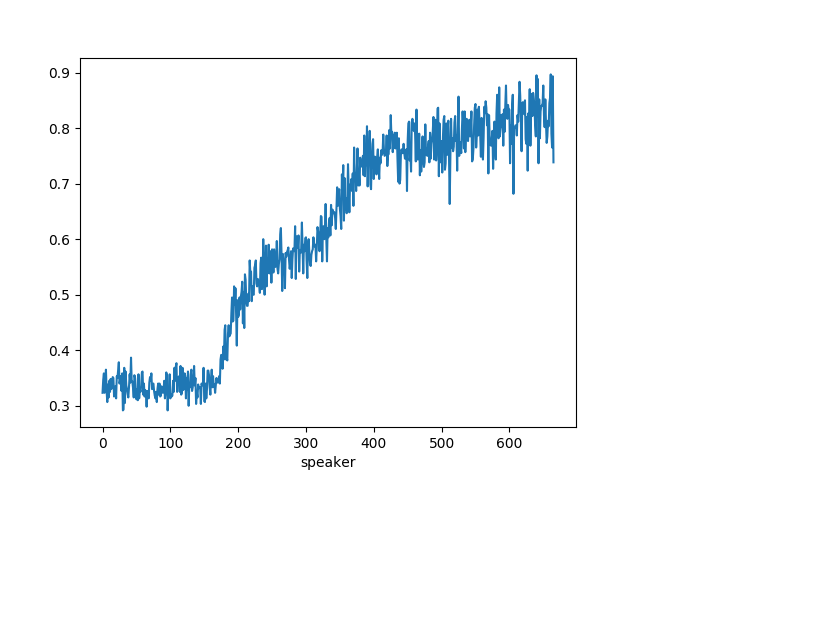

 message:  [0]  output:  0  epoch no:  0  avg reward 0.8166666666666667
 epoch no:  0  avg reward 0.8166666666666667


InvalidArgumentError: Must have updates.shape = indices.shape + params.shape[1:], got updates.shape [64,9], indices.shape [32], params.shape [32000,9]
	 [[Node: ppo/observe-timestep/store/ScatterUpdate = ScatterUpdate[T=DT_FLOAT, Tindices=DT_INT32, _class=["loc:@ppo/initialize/latest/initialize/state-state"], use_locking=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ppo/initialize/latest/initialize/state-state, ppo/observe-timestep/store/mod, ppo/strided_slice, ^ppo/observe-timestep/store/AssignSub)]]

Caused by op 'ppo/observe-timestep/store/ScatterUpdate', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-719b2fb8640c>", line 7, in <module>
    Speaker1, Listener1 = get_agents(ppo_config, network_config, sender_type, n_features, img_dim, img_features_len, n_samples, num_actions, action_size)
  File "/media/petrichor/data/future/emergence-of-writing-systems/agents.py", line 22, in get_agents
    network=network_deep,
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/agents/agent.py", line 283, in from_spec
    kwargs=kwargs
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/util.py", line 192, in get_object
    return obj(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/agents/ppo_agent.py", line 155, in __init__
    entropy_regularization=entropy_regularization
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/agents/learning_agent.py", line 141, in __init__
    batching_capacity=batching_capacity
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/agents/agent.py", line 80, in __init__
    self.model = self.initialize_model()
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/agents/ppo_agent.py", line 183, in initialize_model
    likelihood_ratio_clipping=self.likelihood_ratio_clipping
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/pg_prob_ratio_model.py", line 88, in __init__
    gae_lambda=gae_lambda
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/pg_model.py", line 98, in __init__
    requires_deterministic=False
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/distribution_model.py", line 90, in __init__
    discount=discount
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/memory_model.py", line 114, in __init__
    reward_preprocessing=reward_preprocessing
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/model.py", line 217, in __init__
    self.setup()
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/model.py", line 290, in setup
    independent=independent
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/memory_model.py", line 605, in create_operations
    independent=independent
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/model.py", line 1195, in create_operations
    self.create_observe_operations(reward=reward, terminal=terminal)
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/model.py", line 1129, in create_observe_operations
    reward=reward
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/template.py", line 464, in __call__
    result = self._call_func(args, kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/template.py", line 406, in _call_func
    result = self._func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/models/memory_model.py", line 504, in tf_observe_timestep
    reward=reward
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/template.py", line 455, in __call__
    result = self._call_func(args, kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/template.py", line 400, in _call_func
    result = self._func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorforce/core/memories/queue.py", line 176, in tf_store
    updates=states[name]
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/state_ops.py", line 356, in scatter_update
    use_locking=use_locking, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_state_ops.py", line 984, in scatter_update
    use_locking=use_locking, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Must have updates.shape = indices.shape + params.shape[1:], got updates.shape [64,9], indices.shape [32], params.shape [32000,9]
	 [[Node: ppo/observe-timestep/store/ScatterUpdate = ScatterUpdate[T=DT_FLOAT, Tindices=DT_INT32, _class=["loc:@ppo/initialize/latest/initialize/state-state"], use_locking=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](ppo/initialize/latest/initialize/state-state, ppo/observe-timestep/store/mod, ppo/strided_slice, ^ppo/observe-timestep/store/AssignSub)]]


In [5]:
### N population 10

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break



<IPython.core.display.Javascript object>


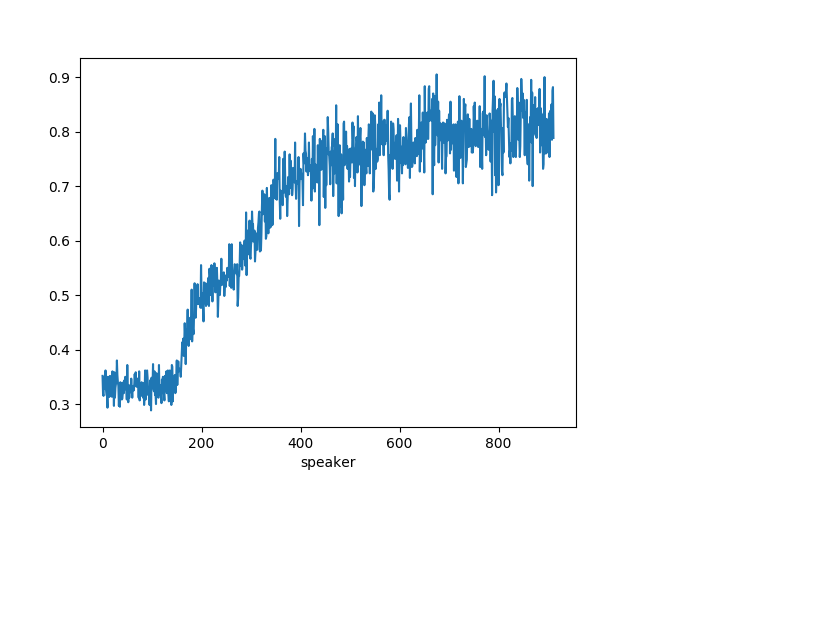

 message:  [2]  output:  2  epoch no:  0  avg reward 0.28125
 epoch no:  0  avg reward 0.28125
 message:  [2]  output:  2  epoch no:  100  avg reward 0.3516666666666667
 epoch no:  100  avg reward 0.3516666666666667
 message:  [0]  output:  0  epoch no:  200  avg reward 0.31833333333333336
 epoch no:  200  avg reward 0.31833333333333336
 message:  [4]  output:  0  epoch no:  300  avg reward 0.315
 epoch no:  300  avg reward 0.315
 message:  [1]  output:  2  epoch no:  400  avg reward 0.35
 epoch no:  400  avg reward 0.35
 message:  [2]  output:  1  epoch no:  500  avg reward 0.3283333333333333
 epoch no:  500  avg reward 0.3283333333333333
 message:  [3]  output:  1  epoch no:  600  avg reward 0.33
 epoch no:  600  avg reward 0.33
 message:  [1]  output:  0  epoch no:  700  avg reward 0.3616666666666667
 epoch no:  700  avg reward 0.3616666666666667
 message:  [2]  output:  1  epoch no:  800  avg reward 0.32666666666666666
 epoch no:  800  avg reward 0.32666666666666666
 message:  [4] 

 message:  [3]  output:  1  epoch no:  7200  avg reward 0.3466666666666667
 epoch no:  7200  avg reward 0.3466666666666667
 message:  [0]  output:  2  epoch no:  7300  avg reward 0.3466666666666667
 epoch no:  7300  avg reward 0.3466666666666667
 message:  [2]  output:  2  epoch no:  7400  avg reward 0.31166666666666665
 epoch no:  7400  avg reward 0.31166666666666665
 message:  [2]  output:  1  epoch no:  7500  avg reward 0.36
 epoch no:  7500  avg reward 0.36
 message:  [4]  output:  0  epoch no:  7600  avg reward 0.30666666666666664
 epoch no:  7600  avg reward 0.30666666666666664
 message:  [1]  output:  1  epoch no:  7700  avg reward 0.33
 epoch no:  7700  avg reward 0.33
 message:  [1]  output:  0  epoch no:  7800  avg reward 0.335
 epoch no:  7800  avg reward 0.335
 message:  [0]  output:  0  epoch no:  7900  avg reward 0.315
 epoch no:  7900  avg reward 0.315
 message:  [3]  output:  0  epoch no:  8000  avg reward 0.34
 epoch no:  8000  avg reward 0.34
 message:  [4]  output:  

 message:  [4]  output:  0  epoch no:  14300  avg reward 0.305
 epoch no:  14300  avg reward 0.305
 message:  [3]  output:  2  epoch no:  14400  avg reward 0.345
 epoch no:  14400  avg reward 0.345
 message:  [3]  output:  0  epoch no:  14500  avg reward 0.3416666666666667
 epoch no:  14500  avg reward 0.3416666666666667
 message:  [2]  output:  2  epoch no:  14600  avg reward 0.3233333333333333
 epoch no:  14600  avg reward 0.3233333333333333
 message:  [2]  output:  2  epoch no:  14700  avg reward 0.35333333333333333
 epoch no:  14700  avg reward 0.35333333333333333
 message:  [1]  output:  0  epoch no:  14800  avg reward 0.32
 epoch no:  14800  avg reward 0.32
 message:  [4]  output:  2  epoch no:  14900  avg reward 0.3233333333333333
 epoch no:  14900  avg reward 0.3233333333333333
 message:  [2]  output:  0  epoch no:  15000  avg reward 0.35333333333333333
 epoch no:  15000  avg reward 0.35333333333333333
 message:  [0]  output:  1  epoch no:  15100  avg reward 0.38
 epoch no:  15

 message:  [0]  output:  2  epoch no:  21500  avg reward 0.5316666666666666
 epoch no:  21500  avg reward 0.5316666666666666
 message:  [0]  output:  1  epoch no:  21600  avg reward 0.48
 epoch no:  21600  avg reward 0.48
 message:  [2]  output:  0  epoch no:  21700  avg reward 0.5483333333333333
 epoch no:  21700  avg reward 0.5483333333333333
 message:  [2]  output:  0  epoch no:  21800  avg reward 0.5333333333333333
 epoch no:  21800  avg reward 0.5333333333333333
 message:  [0]  output:  0  epoch no:  21900  avg reward 0.5333333333333333
 epoch no:  21900  avg reward 0.5333333333333333
 message:  [4]  output:  2  epoch no:  22000  avg reward 0.5
 epoch no:  22000  avg reward 0.5
 message:  [3]  output:  1  epoch no:  22100  avg reward 0.555
 epoch no:  22100  avg reward 0.555
 message:  [0]  output:  2  epoch no:  22200  avg reward 0.5416666666666666
 epoch no:  22200  avg reward 0.5416666666666666
 message:  [0]  output:  1  epoch no:  22300  avg reward 0.48833333333333334
 epoch 

 message:  [0]  output:  1  epoch no:  28600  avg reward 0.5666666666666667
 epoch no:  28600  avg reward 0.5666666666666667
 message:  [0]  output:  0  epoch no:  28700  avg reward 0.5833333333333334
 epoch no:  28700  avg reward 0.5833333333333334
 message:  [2]  output:  2  epoch no:  28800  avg reward 0.6
 epoch no:  28800  avg reward 0.6
 message:  [4]  output:  0  epoch no:  28900  avg reward 0.5583333333333333
 epoch no:  28900  avg reward 0.5583333333333333
 message:  [1]  output:  2  epoch no:  29000  avg reward 0.5533333333333333
 epoch no:  29000  avg reward 0.5533333333333333
 message:  [1]  output:  0  epoch no:  29100  avg reward 0.6516666666666666
 epoch no:  29100  avg reward 0.6516666666666666
 message:  [2]  output:  0  epoch no:  29200  avg reward 0.5366666666666666
 epoch no:  29200  avg reward 0.5366666666666666
 message:  [0]  output:  0  epoch no:  29300  avg reward 0.5816666666666667
 epoch no:  29300  avg reward 0.5816666666666667
 message:  [1]  output:  1  ep

 message:  [0]  output:  0  epoch no:  35600  avg reward 0.7233333333333334
 epoch no:  35600  avg reward 0.7233333333333334
 message:  [1]  output:  1  epoch no:  35700  avg reward 0.7133333333333334
 epoch no:  35700  avg reward 0.7133333333333334
 message:  [0]  output:  1  epoch no:  35800  avg reward 0.7533333333333333
 epoch no:  35800  avg reward 0.7533333333333333
 message:  [0]  output:  1  epoch no:  35900  avg reward 0.6733333333333333
 epoch no:  35900  avg reward 0.6733333333333333
 message:  [0]  output:  2  epoch no:  36000  avg reward 0.64
 epoch no:  36000  avg reward 0.64
 message:  [0]  output:  2  epoch no:  36100  avg reward 0.6916666666666667
 epoch no:  36100  avg reward 0.6916666666666667
 message:  [1]  output:  0  epoch no:  36200  avg reward 0.69
 epoch no:  36200  avg reward 0.69
 message:  [3]  output:  2  epoch no:  36300  avg reward 0.69
 epoch no:  36300  avg reward 0.69
 message:  [0]  output:  2  epoch no:  36400  avg reward 0.675
 epoch no:  36400  av

 message:  [1]  output:  2  epoch no:  42800  avg reward 0.7383333333333333
 epoch no:  42800  avg reward 0.7383333333333333
 message:  [3]  output:  0  epoch no:  42900  avg reward 0.805
 epoch no:  42900  avg reward 0.805
 message:  [1]  output:  0  epoch no:  43000  avg reward 0.69
 epoch no:  43000  avg reward 0.69
 message:  [0]  output:  0  epoch no:  43100  avg reward 0.74
 epoch no:  43100  avg reward 0.74
 message:  [0]  output:  0  epoch no:  43200  avg reward 0.725
 epoch no:  43200  avg reward 0.725
 message:  [4]  output:  2  epoch no:  43300  avg reward 0.73
 epoch no:  43300  avg reward 0.73
 message:  [1]  output:  2  epoch no:  43400  avg reward 0.7383333333333333
 epoch no:  43400  avg reward 0.7383333333333333
 message:  [1]  output:  1  epoch no:  43500  avg reward 0.7066666666666667
 epoch no:  43500  avg reward 0.7066666666666667
 message:  [4]  output:  2  epoch no:  43600  avg reward 0.775
 epoch no:  43600  avg reward 0.775
 message:  [4]  output:  1  epoch no:

 message:  [0]  output:  2  epoch no:  49900  avg reward 0.7083333333333334
 epoch no:  49900  avg reward 0.7083333333333334
 message:  [3]  output:  0  epoch no:  50000  avg reward 0.7683333333333333
 epoch no:  50000  avg reward 0.7683333333333333
 message:  [1]  output:  2  epoch no:  50100  avg reward 0.7166666666666667
 epoch no:  50100  avg reward 0.7166666666666667
 message:  [0]  output:  0  epoch no:  50200  avg reward 0.755
 epoch no:  50200  avg reward 0.755
 message:  [4]  output:  2  epoch no:  50300  avg reward 0.745
 epoch no:  50300  avg reward 0.745
 message:  [0]  output:  0  epoch no:  50400  avg reward 0.77
 epoch no:  50400  avg reward 0.77
 message:  [1]  output:  0  epoch no:  50500  avg reward 0.7433333333333333
 epoch no:  50500  avg reward 0.7433333333333333
 message:  [3]  output:  2  epoch no:  50600  avg reward 0.8166666666666667
 epoch no:  50600  avg reward 0.8166666666666667
 message:  [3]  output:  2  epoch no:  50700  avg reward 0.7866666666666666
 epo

 message:  [3]  output:  0  epoch no:  57000  avg reward 0.8216666666666667
 epoch no:  57000  avg reward 0.8216666666666667
 message:  [0]  output:  1  epoch no:  57100  avg reward 0.8216666666666667
 epoch no:  57100  avg reward 0.8216666666666667
 message:  [1]  output:  1  epoch no:  57200  avg reward 0.7766666666666666
 epoch no:  57200  avg reward 0.7766666666666666
 message:  [3]  output:  2  epoch no:  57300  avg reward 0.8116666666666666
 epoch no:  57300  avg reward 0.8116666666666666
 message:  [0]  output:  2  epoch no:  57400  avg reward 0.7983333333333333
 epoch no:  57400  avg reward 0.7983333333333333
 message:  [0]  output:  0  epoch no:  57500  avg reward 0.7833333333333333
 epoch no:  57500  avg reward 0.7833333333333333
 message:  [0]  output:  0  epoch no:  57600  avg reward 0.7933333333333333
 epoch no:  57600  avg reward 0.7933333333333333
 message:  [4]  output:  2  epoch no:  57700  avg reward 0.8383333333333334
 epoch no:  57700  avg reward 0.8383333333333334


 message:  [3]  output:  1  epoch no:  64000  avg reward 0.795
 epoch no:  64000  avg reward 0.795
 message:  [0]  output:  2  epoch no:  64100  avg reward 0.8666666666666667
 epoch no:  64100  avg reward 0.8666666666666667
 message:  [0]  output:  1  epoch no:  64200  avg reward 0.7266666666666667
 epoch no:  64200  avg reward 0.7266666666666667
 message:  [0]  output:  1  epoch no:  64300  avg reward 0.7866666666666666
 epoch no:  64300  avg reward 0.7866666666666666
 message:  [4]  output:  0  epoch no:  64400  avg reward 0.745
 epoch no:  64400  avg reward 0.745
 message:  [0]  output:  0  epoch no:  64500  avg reward 0.8166666666666667
 epoch no:  64500  avg reward 0.8166666666666667
 message:  [0]  output:  0  epoch no:  64600  avg reward 0.7683333333333333
 epoch no:  64600  avg reward 0.7683333333333333
 message:  [2]  output:  1  epoch no:  64700  avg reward 0.7833333333333333
 epoch no:  64700  avg reward 0.7833333333333333
 message:  [1]  output:  2  epoch no:  64800  avg re

 message:  [1]  output:  1  epoch no:  71200  avg reward 0.8066666666666666
 epoch no:  71200  avg reward 0.8066666666666666
 message:  [3]  output:  0  epoch no:  71300  avg reward 0.7766666666666666
 epoch no:  71300  avg reward 0.7766666666666666
 message:  [1]  output:  1  epoch no:  71400  avg reward 0.8133333333333334
 epoch no:  71400  avg reward 0.8133333333333334
 message:  [1]  output:  2  epoch no:  71500  avg reward 0.7833333333333333
 epoch no:  71500  avg reward 0.7833333333333333
 message:  [4]  output:  2  epoch no:  71600  avg reward 0.7166666666666667
 epoch no:  71600  avg reward 0.7166666666666667
 message:  [1]  output:  0  epoch no:  71700  avg reward 0.7933333333333333
 epoch no:  71700  avg reward 0.7933333333333333
 message:  [4]  output:  0  epoch no:  71800  avg reward 0.7933333333333333
 epoch no:  71800  avg reward 0.7933333333333333
 message:  [0]  output:  1  epoch no:  71900  avg reward 0.8183333333333334
 epoch no:  71900  avg reward 0.8183333333333334


 message:  [0]  output:  2  epoch no:  78200  avg reward 0.78
 epoch no:  78200  avg reward 0.78
 message:  [2]  output:  0  epoch no:  78300  avg reward 0.8333333333333334
 epoch no:  78300  avg reward 0.8333333333333334
 message:  [0]  output:  0  epoch no:  78400  avg reward 0.8216666666666667
 epoch no:  78400  avg reward 0.8216666666666667
 message:  [4]  output:  2  epoch no:  78500  avg reward 0.745
 epoch no:  78500  avg reward 0.745
 message:  [0]  output:  1  epoch no:  78600  avg reward 0.82
 epoch no:  78600  avg reward 0.82
 message:  [4]  output:  1  epoch no:  78700  avg reward 0.7933333333333333
 epoch no:  78700  avg reward 0.7933333333333333
 message:  [3]  output:  2  epoch no:  78800  avg reward 0.6833333333333333
 epoch no:  78800  avg reward 0.6833333333333333
 message:  [1]  output:  2  epoch no:  78900  avg reward 0.8383333333333334
 epoch no:  78900  avg reward 0.8383333333333334
 message:  [1]  output:  0  epoch no:  79000  avg reward 0.8666666666666667
 epoch

 message:  [0]  output:  0  epoch no:  85300  avg reward 0.82
 epoch no:  85300  avg reward 0.82
 message:  [1]  output:  2  epoch no:  85400  avg reward 0.7566666666666667
 epoch no:  85400  avg reward 0.7566666666666667
 message:  [1]  output:  1  epoch no:  85500  avg reward 0.835
 epoch no:  85500  avg reward 0.835
 message:  [1]  output:  1  epoch no:  85600  avg reward 0.7633333333333333
 epoch no:  85600  avg reward 0.7633333333333333
 message:  [0]  output:  2  epoch no:  85700  avg reward 0.82
 epoch no:  85700  avg reward 0.82
 message:  [0]  output:  1  epoch no:  85800  avg reward 0.8583333333333333
 epoch no:  85800  avg reward 0.8583333333333333
 message:  [0]  output:  1  epoch no:  85900  avg reward 0.755
 epoch no:  85900  avg reward 0.755
 message:  [4]  output:  1  epoch no:  86000  avg reward 0.74
 epoch no:  86000  avg reward 0.74
 message:  [3]  output:  2  epoch no:  86100  avg reward 0.8133333333333334
 epoch no:  86100  avg reward 0.8133333333333334
 message:  

In [ ]:
### N population 16

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in range(n_epochs):
    Speaker = Speakers[np.random.choice(n_population)]
    Listener = Listeners[np.random.choice(n_population)]
    message_batch = []
    img_batch = []
    r = i%(2*freq)
    if r<1*freq:
        flip_s = False
        flip_l = True
    if r>=1*freq:
        flip_s = True
        flip_l = False
    l_rewards = []
    strokes = []
    for b in range(n_batches):
        strokes = []
#         for idx in range(2):
#             if idx ==0:
#                 feat = np.zeros((10,10), np.uint8)
#             else:
#                 im = message_to_image_sm(strokes, img_dim, img_dim)
# #                 feat = get_features([im])[0]
#                 feat = im.flatten()
        message = Speaker.act(states= game_pool[b].speaker_input(), independent=flip_s)  # (scalar between 0 and 4)
        message_batch.append(message)
#             strokes.append(message)
#         img = message_to_image(strokes, img_rows, img_cols)
#         img_batch.append(img)
#         Speaker.reset()

#     features_batch = get_features(intermediate_layer_model, img_batch)
#     message = Speaker.act(states= game_pool[b].speaker_input(feat), independent=flip_s)
    out_batch = []
    reward_batch = []
    for b in range(n_batches):
        out = Listener.act(states = game_pool[b].listener_input(message_batch[b]), independent = flip_l)
        out_batch.append(out)
        rew = game_pool[b].reward(out)
        reward_batch.append(rew)
        game_pool[b].reset()
    speaker_terminals = []
    rew_speaker = []
    for rew in reward_batch:
        speaker_terminals.extend([True])
        rew_speaker.extend([rew])

    if not flip_s:
#         print('e1')
        e1 = Speaker.model.observe(reward=rew_speaker, terminal=speaker_terminals)
    if not flip_l:
#         print('e2')
        e2 = Listener.model.observe(reward=reward_batch, terminal=[True]*n_batches)
#     assert e1 == e2
#     e = e1
    big_rewards.extend(reward_batch)
    big_rewards = big_rewards[-600:]
    if i%(100)==0:
#         print(" output: ", out)
        avg_rew = sum(big_rewards)/len(big_rewards)
        print(" message: ", message, " output: ", out, " epoch no: ", i, " avg reward", avg_rew)
        print(" epoch no: ", i, " avg reward", avg_rew)

        if(i!=0):
            data.append(avg_rew)
        ax.clear()
        ax.plot(data)
        if not flip_s:
            ax.set_xlabel('speaker')
        else:
            ax.set_xlabel('listener')
        fig.canvas.draw()


#     if sum(big_rewards)/len(big_rewards)>.75:
#         break

